# Advanced_Regression_Housing_Company_Assignment

## Surpise Housing Company Assigenment

### Problem Statement Understanding 

This Assignment is a Programming Assignment Where in We have to Build a Advanced Regression regression Housing Company Model For  Prediction 

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The aim is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. I imported the necessary libraries, read in the data set from the provided file into a data frame, and inspected it.

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



# print library versions
print("\n")
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("sklearn: ",sklearn.__version__)
print("statsmodels: ",statsmodels.__version__)
print("scipy: ",scipy.__version__)



python:  3.11.5
numpy:  1.24.2
pandas:  2.1.1
matplotlib:  3.8.0
seaborn:  0.12.2
sklearn:  1.3.2
statsmodels:  0.14.0
scipy:  1.10.1


In [2]:
#increase font size of all elements of seaborn fonts to make reading easier
sns.set(font_scale=1.5)
# see the data with all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)
pd.set_option('display.width', 1000)

In [8]:
# read data into a first data frame
House = pd.read_csv('train (1).csv')

In [9]:
# display first five rows
House.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [10]:
#display basic statistical information for the data
House.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [11]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here are basic statistical insights.  The standard deviation of quality variables is low, suggesting that the data is clustered around the mean. Other variables appear to have more spread out data. This is also the case for the dependant variable, the sales price. The data may not be normally distributed. This will be determined and addressed in the following section.

In [12]:
# check how many entries there are in the dataset 
House.shape

(1460, 81)

The data set consists of 1460 rows and 81 columns. It contains categorical and continuous variables that describe different types of data the company collects for its business. Not all of the columns will be useful for the analysis. EDA will be used to discover which data will be useful to build the regression model.

## 2. Data Cleaning

### (i) Missing values
The data set was analyzed for missing values. Various columns have missing values. In this section, I will address the missing values and decide based on business logic, and also on the amount of data that is available. 

In [13]:
# check if any missing values are present in the data
House.isnull().sum().sum()

7829

In [14]:
# display the column names that have missing values
House.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [15]:
# check the amount of missing values in the columns
columns_nan =  House.columns[House.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [17]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(House.isnull().sum()/len(House.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(20)

Null values in %
Feature names                  
PoolQC                    99.52
MiscFeature               96.30
Alley                     93.77
Fence                     80.75
MasVnrType                59.73
FireplaceQu               47.26
LotFrontage               17.74
GarageYrBlt                5.55
GarageCond                 5.55
GarageType                 5.55
GarageFinish               5.55
GarageQual                 5.55
BsmtFinType2               2.60
BsmtExposure               2.60
BsmtQual                   2.53
BsmtCond                   2.53
BsmtFinType1               2.53
MasVnrArea                 0.55
Electrical                 0.07
Id                         0.00

***
#### Insight into missing values
There are five columns that have considerable data values missing. The decision was made to drop these columns. Pool, Fence and Fireplace are all features that could be added to or removed from an existing property should it be desired. As such, the missing data may be considered a reflection of business practices, e.g. that it is not particularly valuable data to collect. Miscellaneous features encompass too many potential features that could be included in this group. As such, imputing a value does not appear to provide any useful information, both on a business and a model level.
Alleys may appeal to some customers, but not others. While there are some pros, such as easy access to the garage and garbage collection, there are also negatives, such as having people traverse the public alley constantly, the potential for crime, theft, or vandalism, people blocking the alleyways with their vehicles, etc. This can lead to financial loss. While it might appeal to some buyers who seek something different


In [18]:
#dropping all columns with 45% and more missing values
for col in columns_nan:
    if House[col].isnull().sum()*100/House.shape[0]>45:
        House.drop(col,1, inplace=True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [19]:
House.shape

(1460, 81)

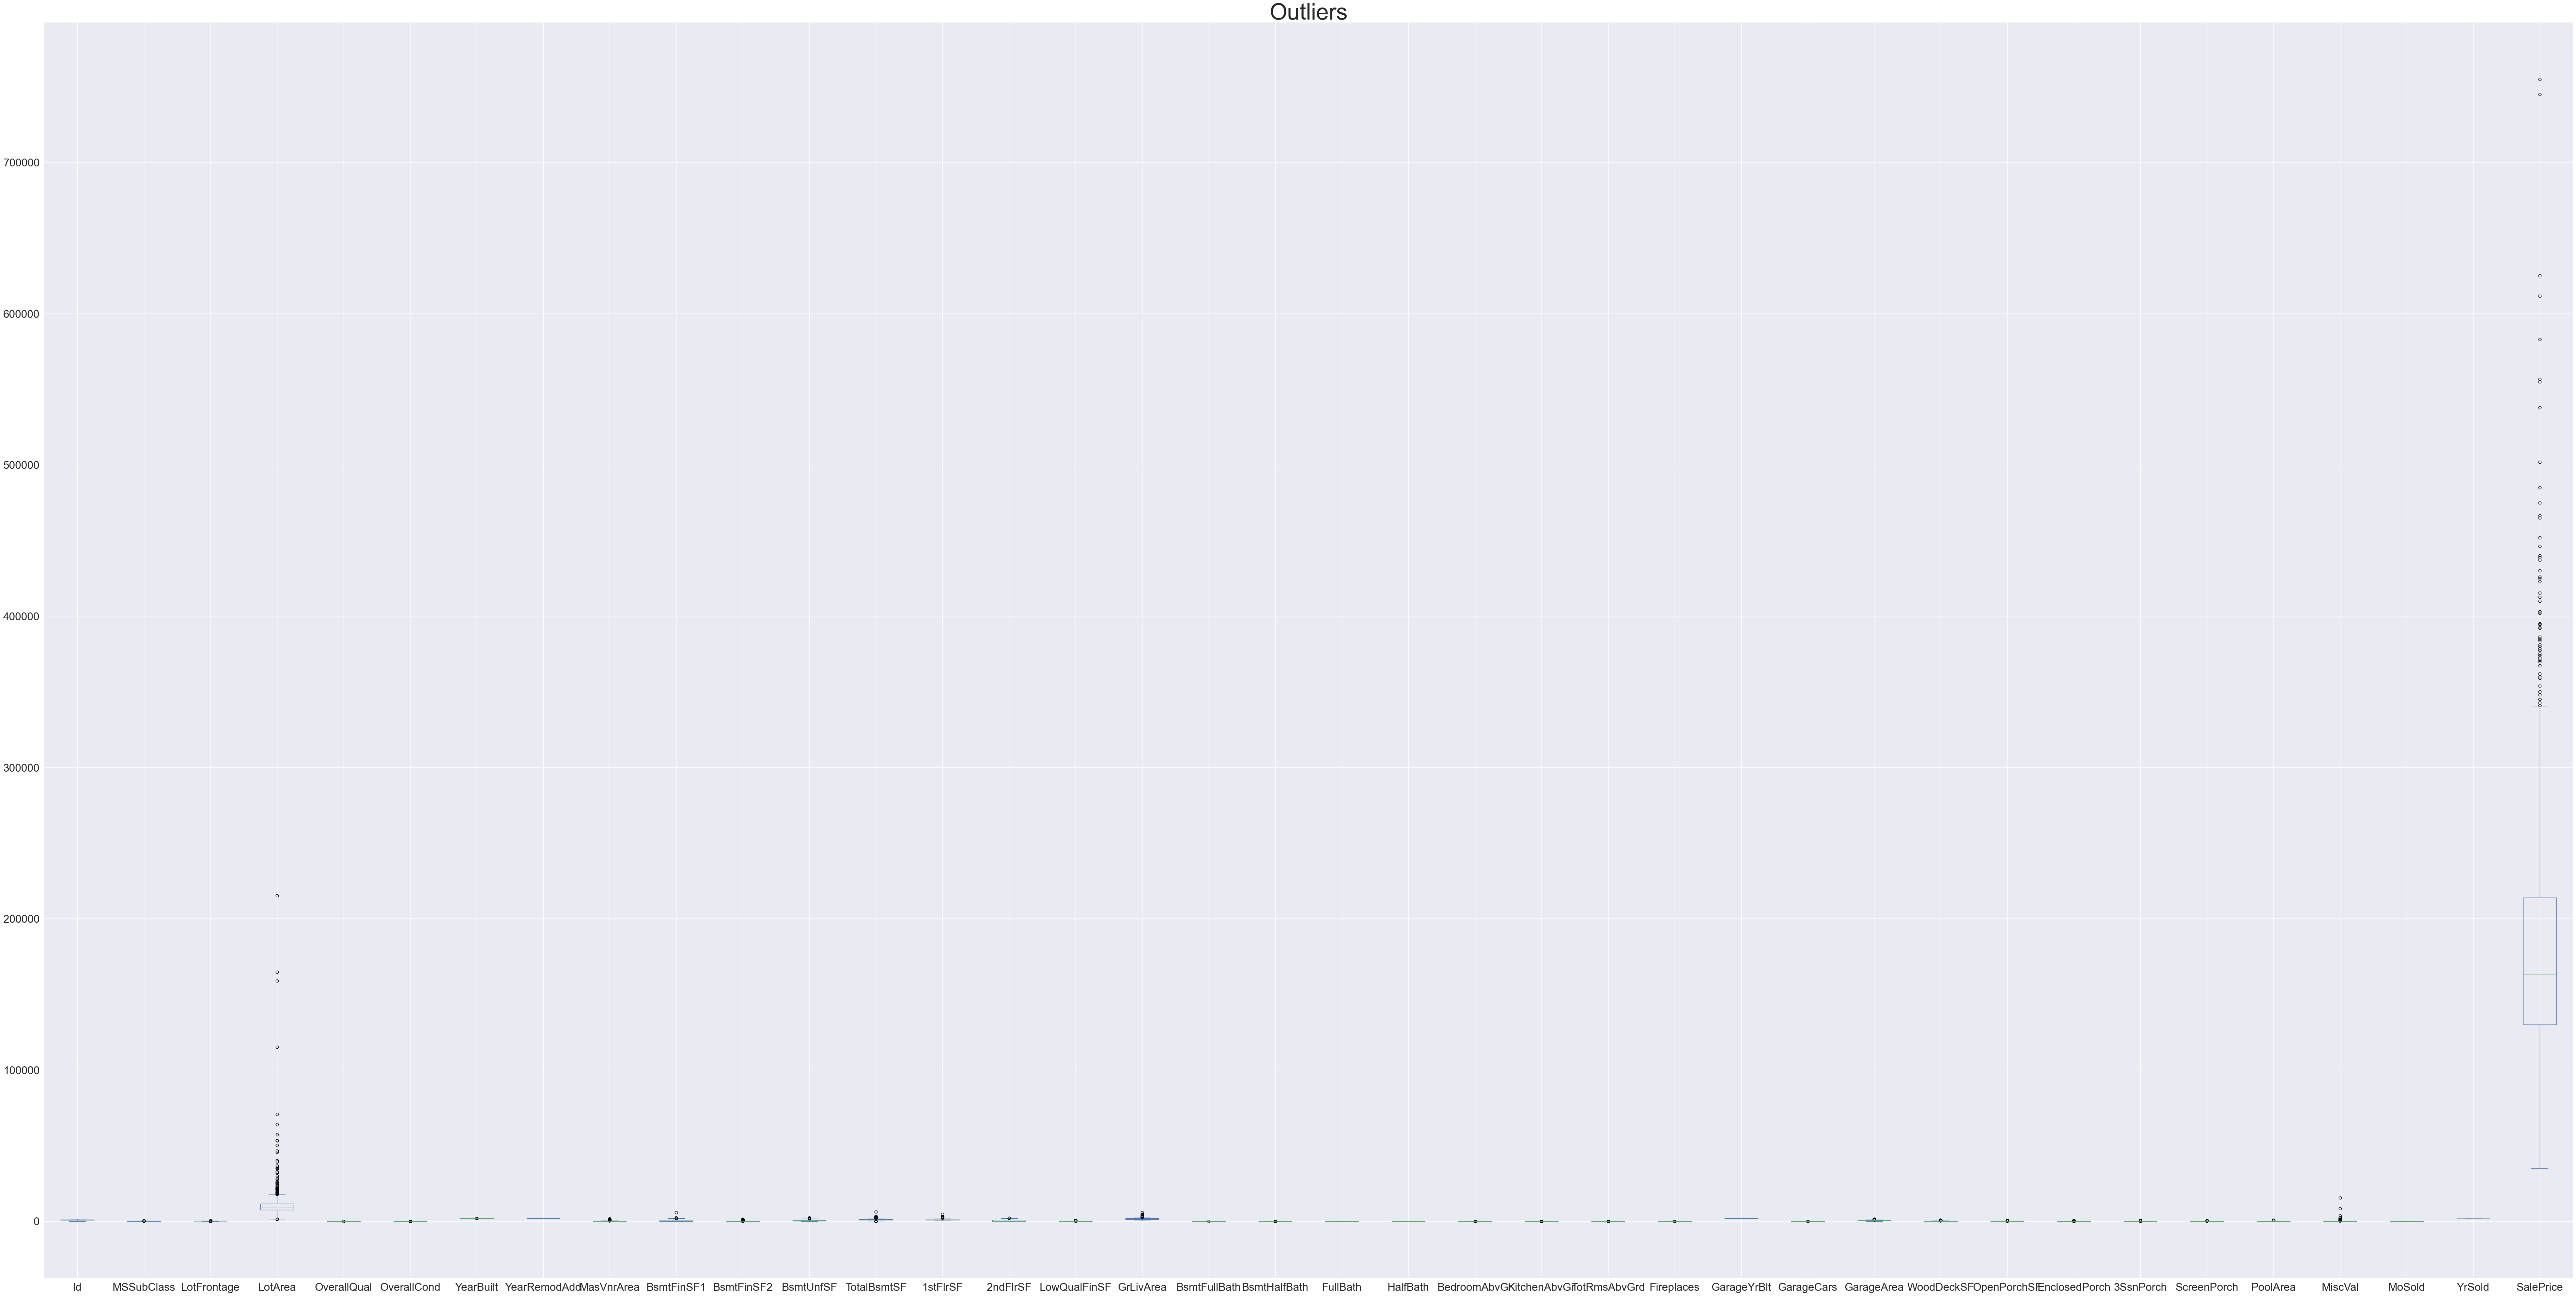

In [29]:
# visualise outliers with boxplot
fig=House.plot.box(title='Outliers', figsize=(100, 50), legend=True, fontsize=24)
fig.axes.title.set_size(50)

The BloxPlot shows that the column with the most variation and outliers is the dependent variable, SalePrice. LotArea has also some outliers

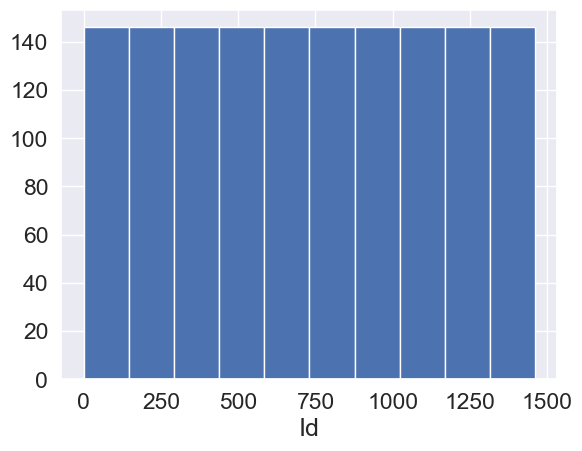

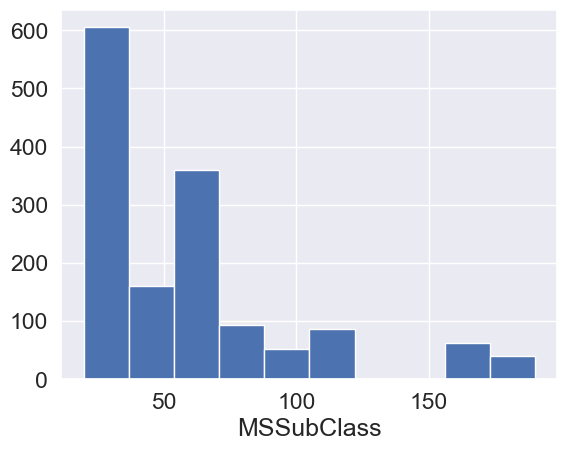

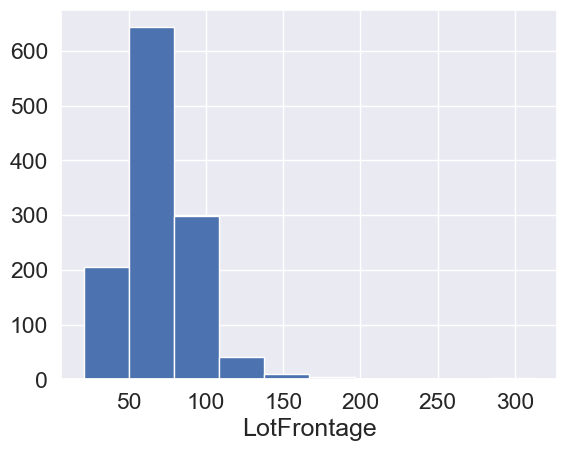

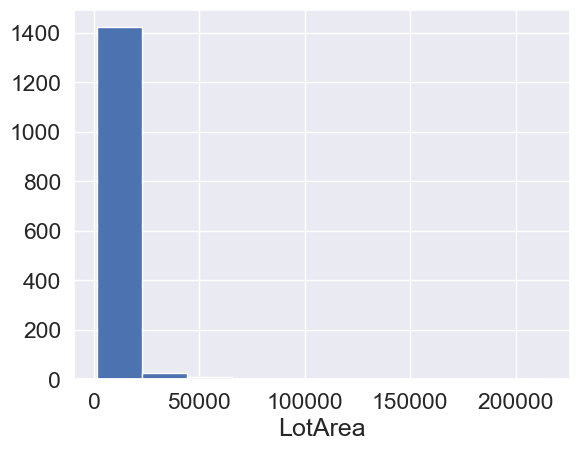

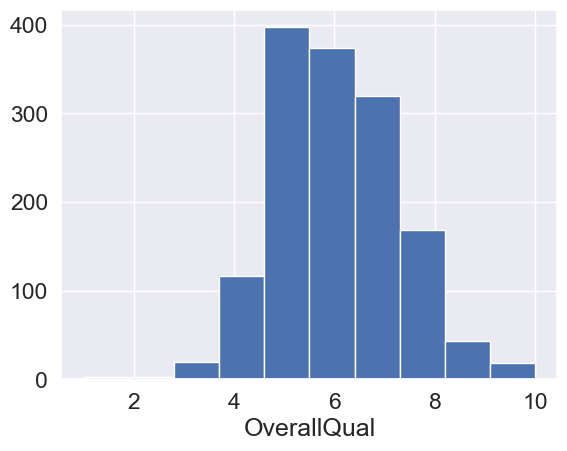

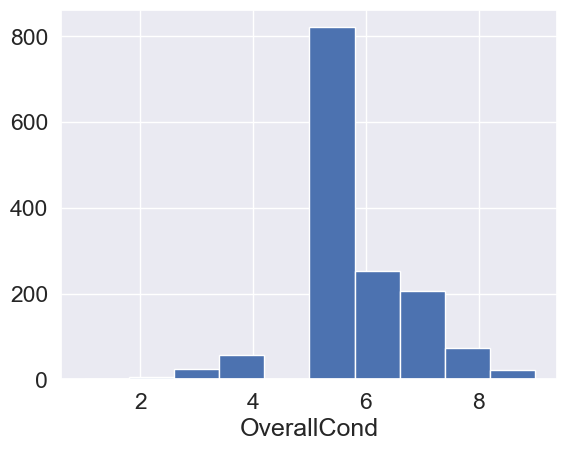

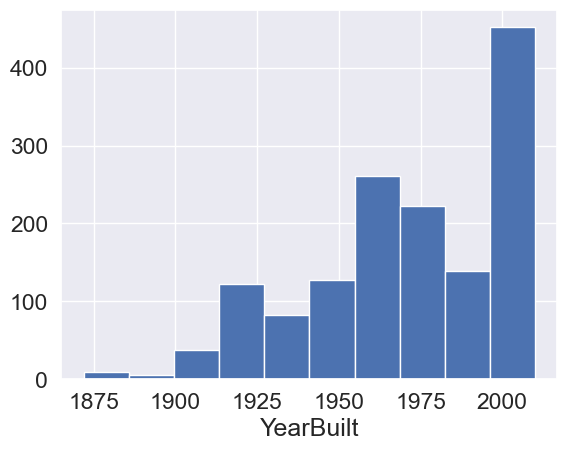

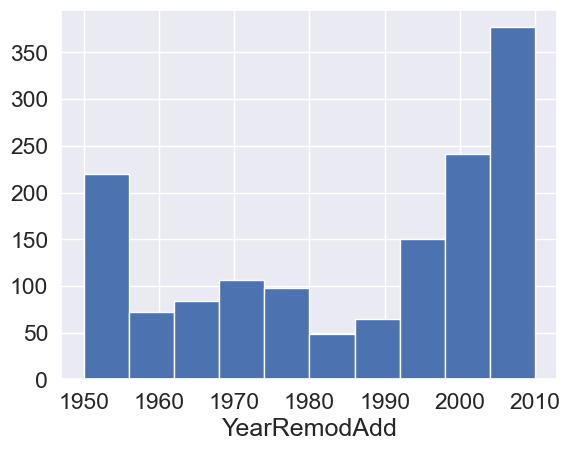

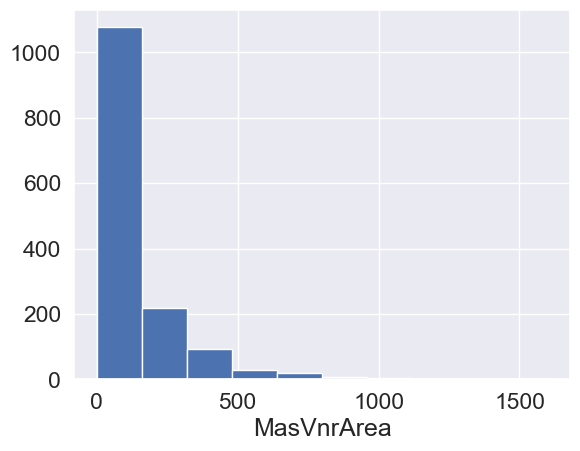

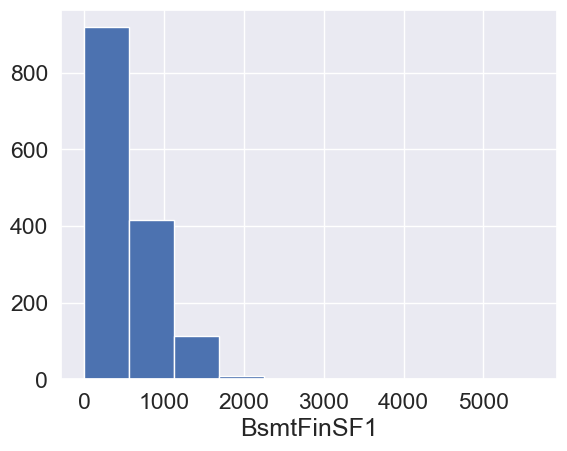

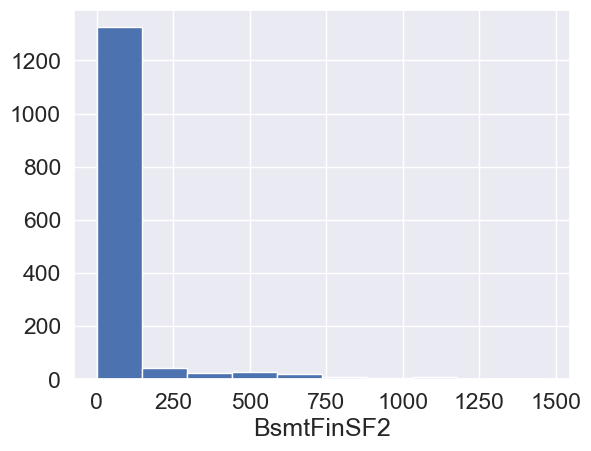

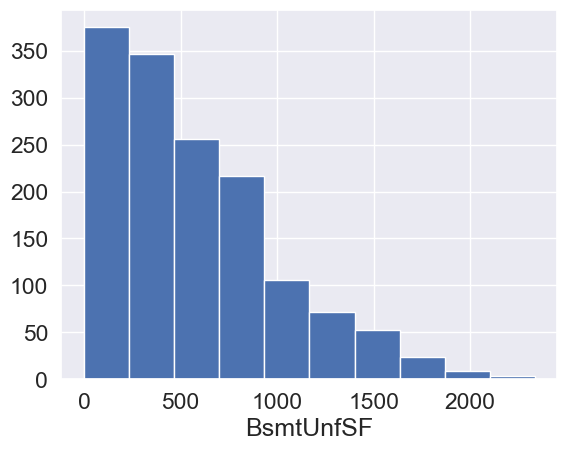

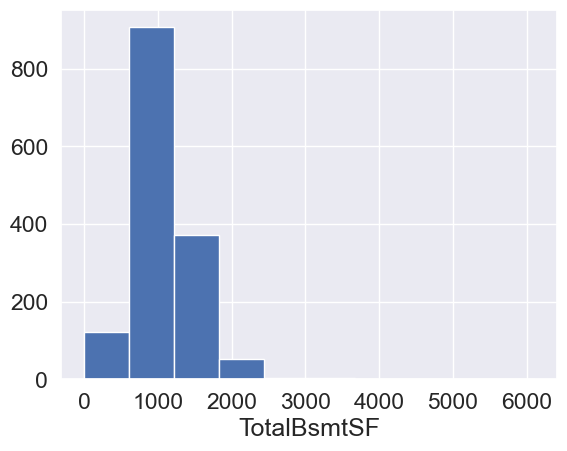

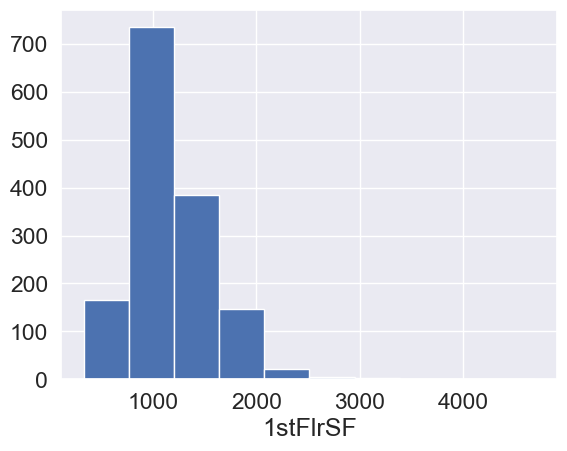

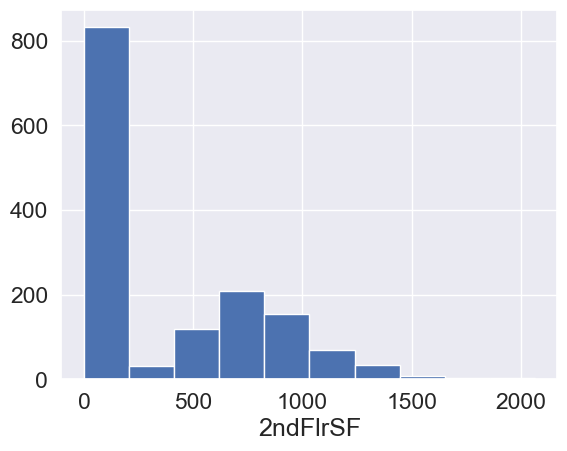

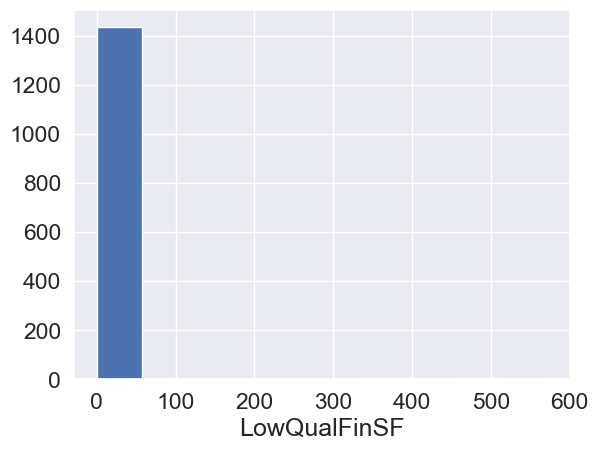

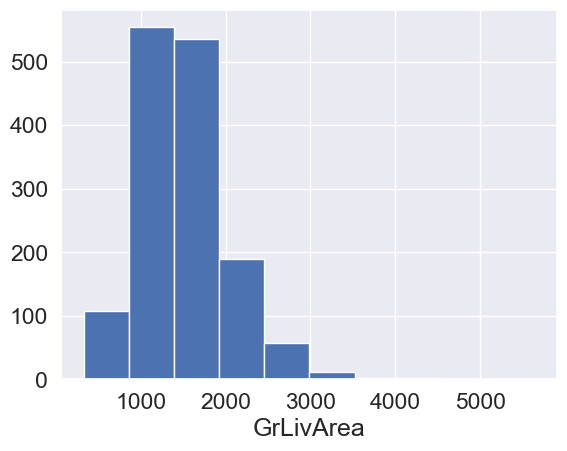

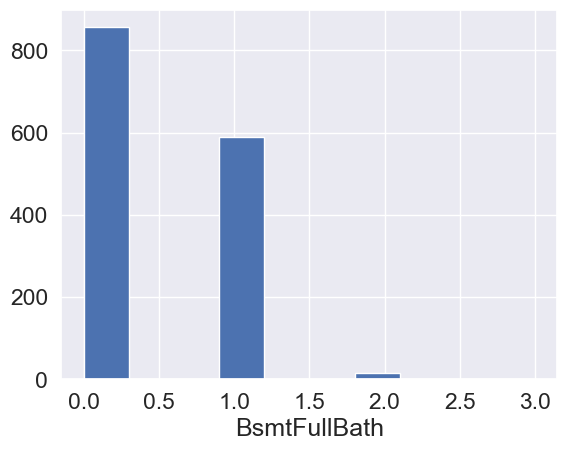

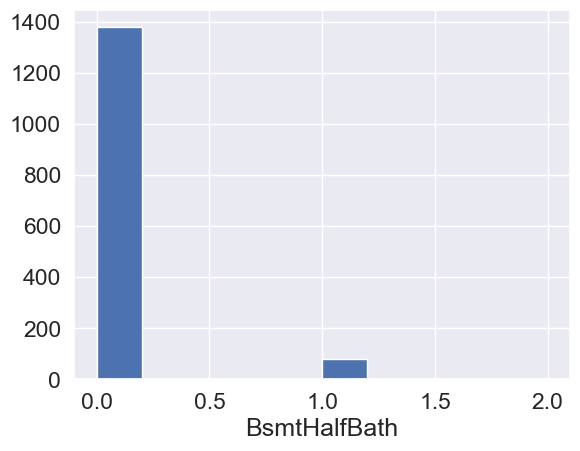

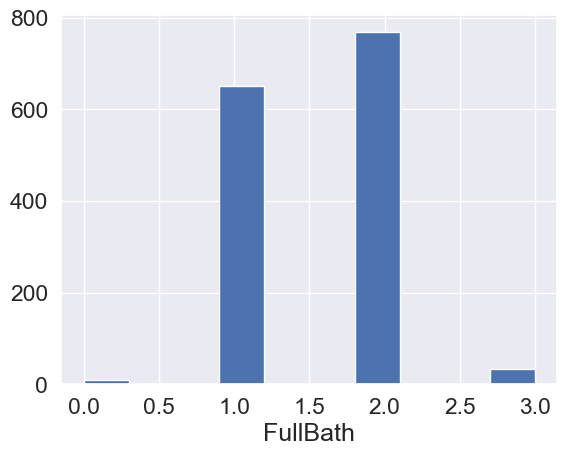

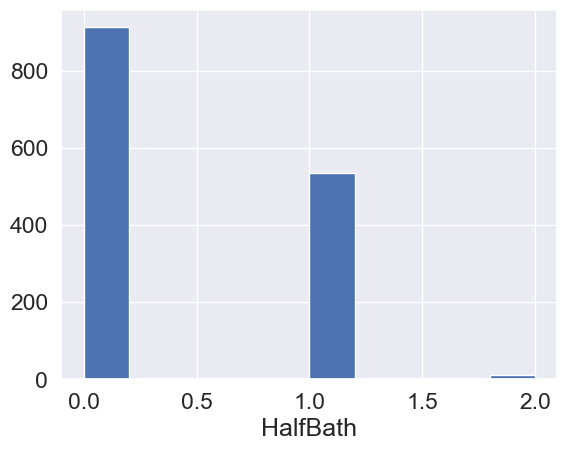

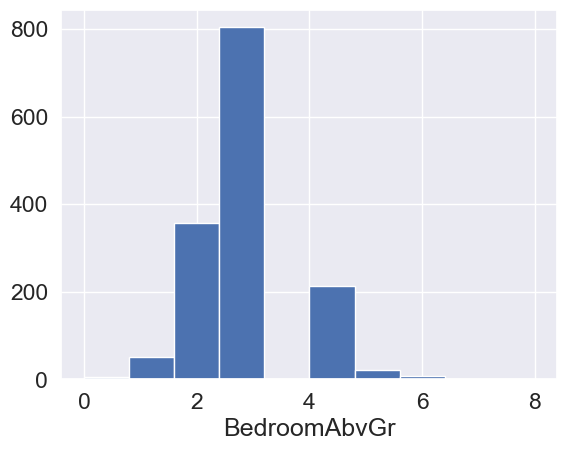

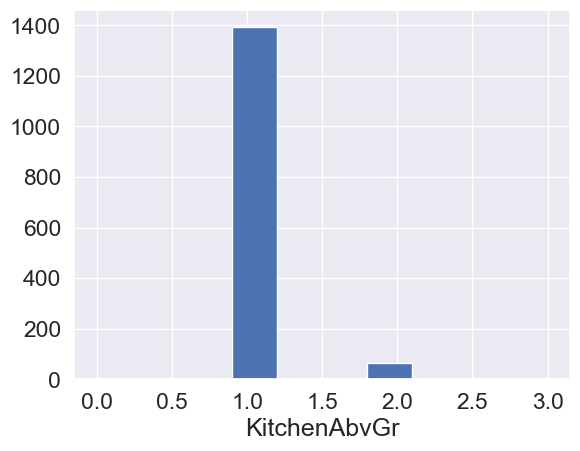

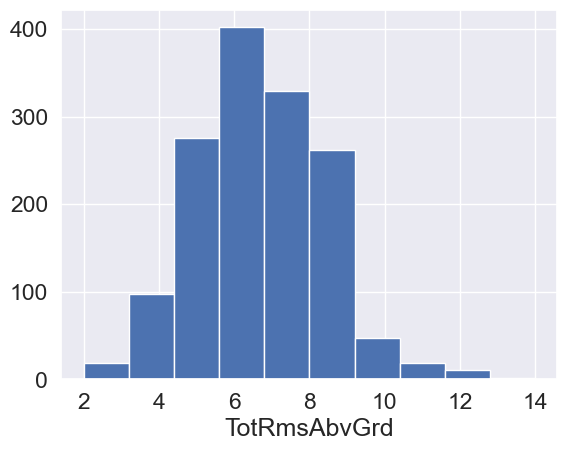

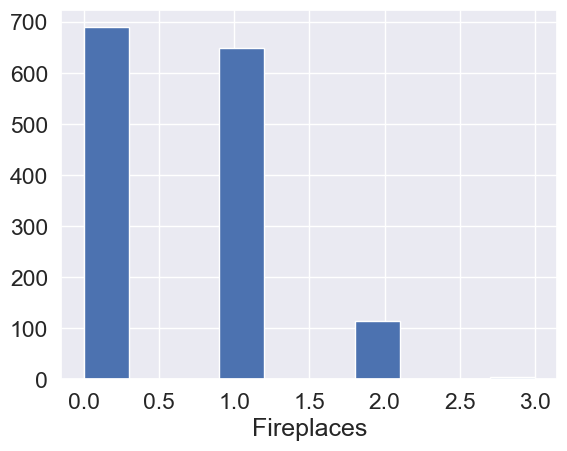

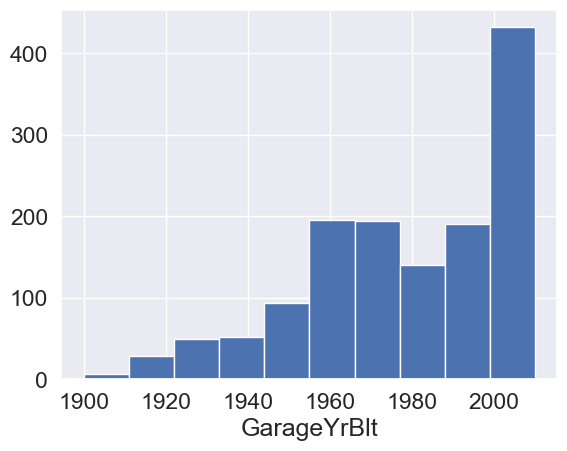

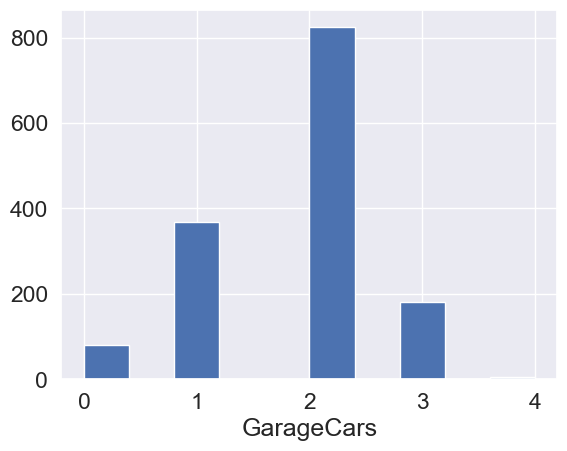

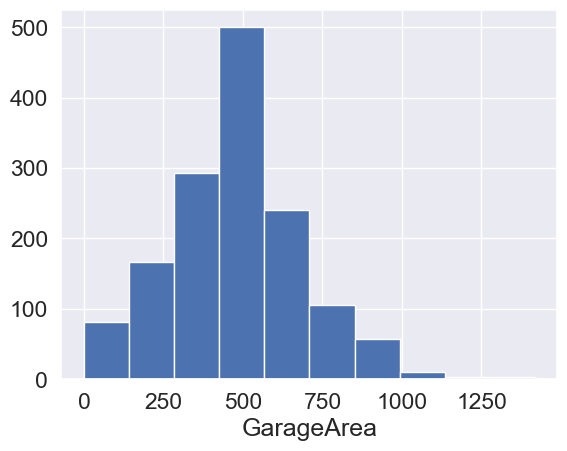

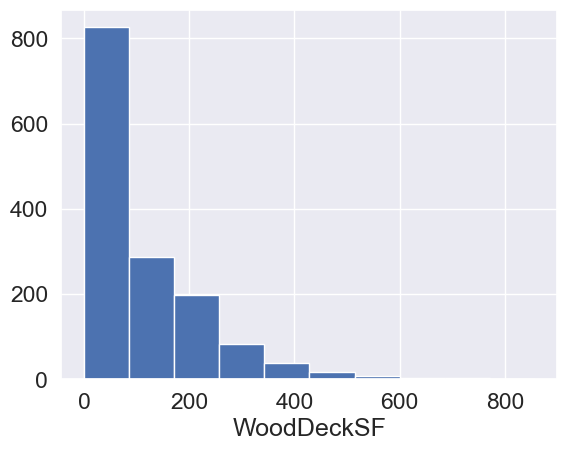

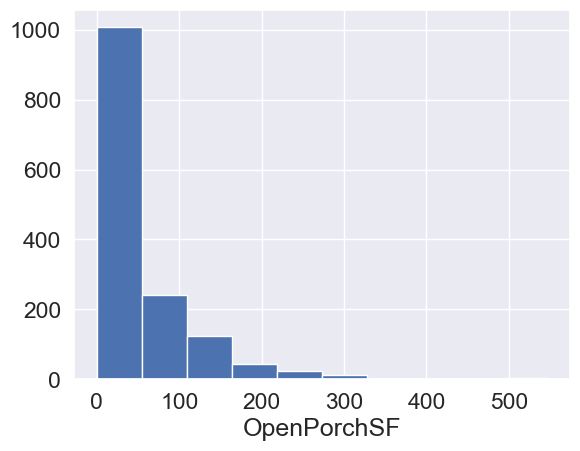

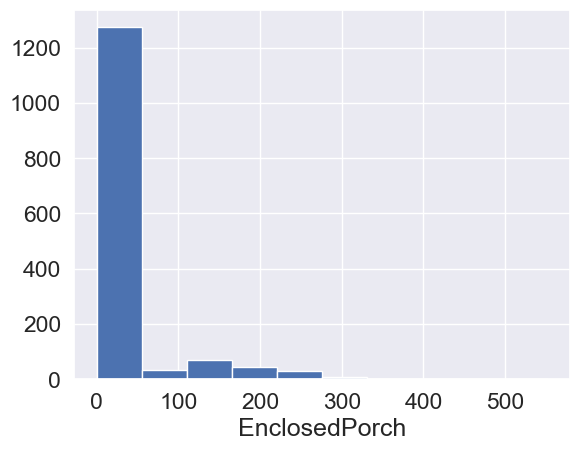

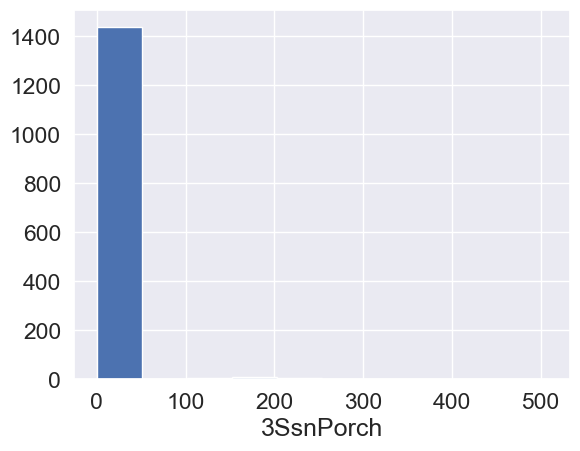

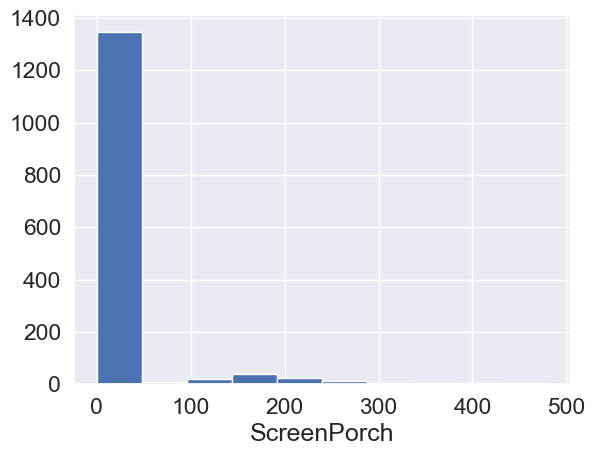

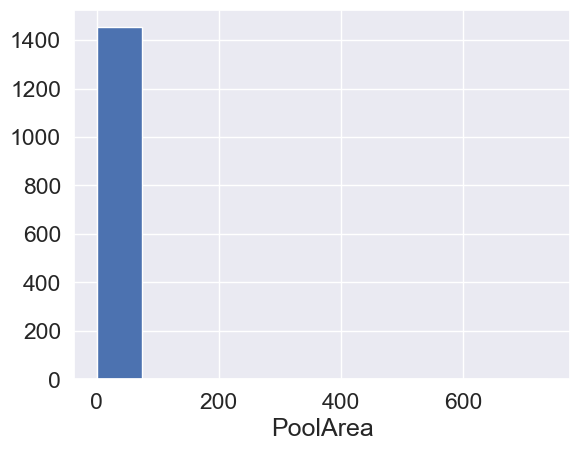

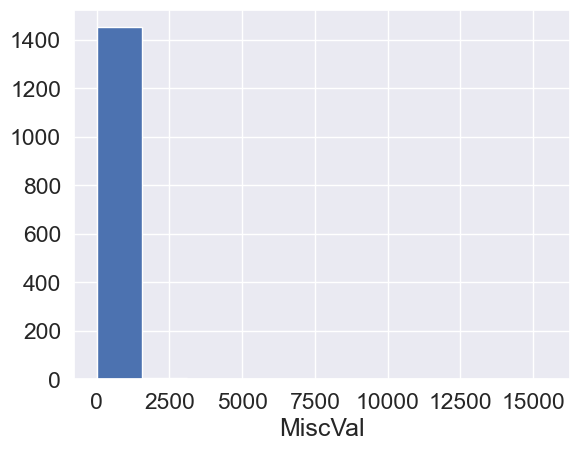

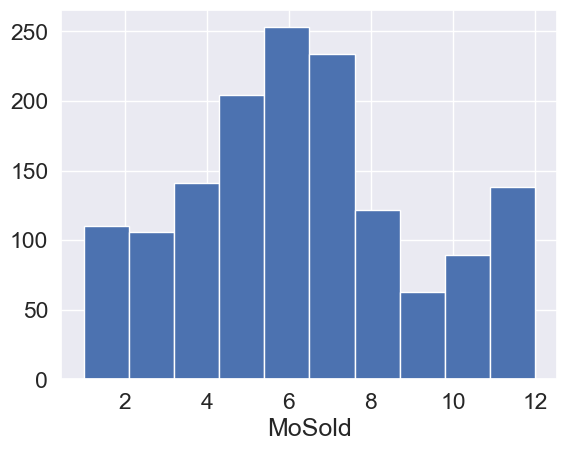

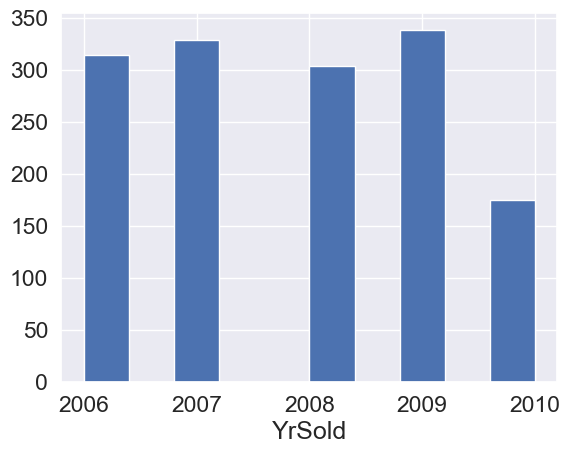

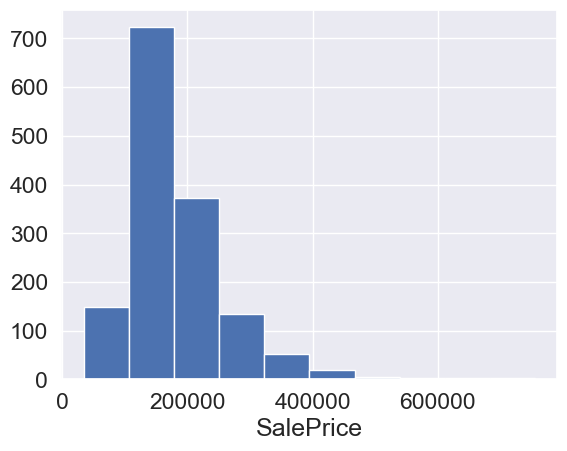

In [30]:
#checking for skewness in numerical data
numerical_features=[feature for feature in House.columns if House[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
        House[feature].hist()
        plt.xlabel(feature)
        plt.show()

The histograms above describe the skewness of the data. They also suggest that LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch contain very little variety in values. This observation is checked through `value_counts`

In [32]:
print(House['PoolArea'].value_counts())
print(House['MiscVal'].value_counts())
print(House['3SsnPorch'].value_counts())
print(House['LowQualFinSF'].value_counts())

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64
LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1


Printing the value counts confirmed that there is very little variation in value, so that there is not much information that would be added to the regression model with these columns. From a business logic standpoint, PoolArea is a similar variable to the previously dropped one. This is also the case for MiscVal - in additon, it has a rather high number of outliers. 3SsnPorchappears to be contained in the other porch values. They are dropped as a result.

In [33]:
House=House.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [34]:
House.shape

(1460, 77)

If the variable is skewed, the mean is biased by the values at the far end of the distribution. The median is a better representation of the majority of the values in the variable. The histograms above are used to determine which features will use the median to impute the missing values.

In [35]:
# re-check the amount of missing values in the columns
columns_nan =  House.columns[House.isnull().any()]

for c in columns_nan:
    print(c, House[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [37]:
#imputing the media
House['LotFrontage']=House['LotFrontage'].fillna(House['LotFrontage'].median())
House['GarageYrBlt']=House['GarageYrBlt'].fillna(House['GarageYrBlt'].median())
House['MasVnrArea']=House['MasVnrArea'].fillna(House['MasVnrArea'].median())


In [38]:
#categorical values: imputing the mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    House[col] = House[col].fillna(House[col].mode()[0])

In [39]:
# checking for the presence of any more null values
House.isnull().values.any()

True

In [40]:
#check the shape of the dataset
House.shape

(1460, 77)

In [41]:
#overview of the data
House.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max    1460.000000   190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.000000  2010.0000

### (ii) Outlier detection
The histograms indicated that not all data is normally distributed. However, even for the data that appears to be normally distributed, there may be outliers which was visualised above. This is addressed here.

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\1181426304.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['BedroomAbvGr'],color='b')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

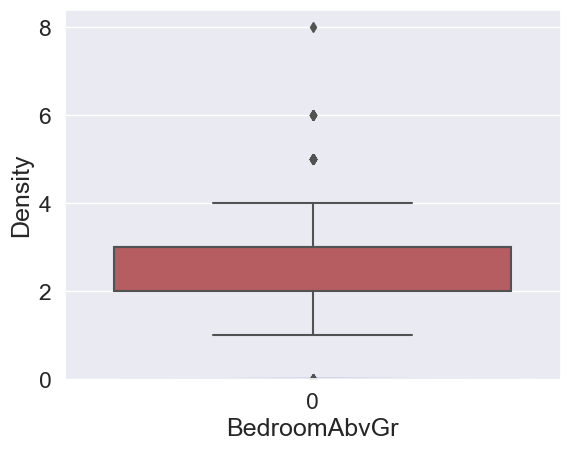

In [42]:
plt.figure()
sns.distplot(House['BedroomAbvGr'],color='b')
sns.boxplot(House['BedroomAbvGr'],color='r')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\1999489973.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['TotRmsAbvGrd'],color='b')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

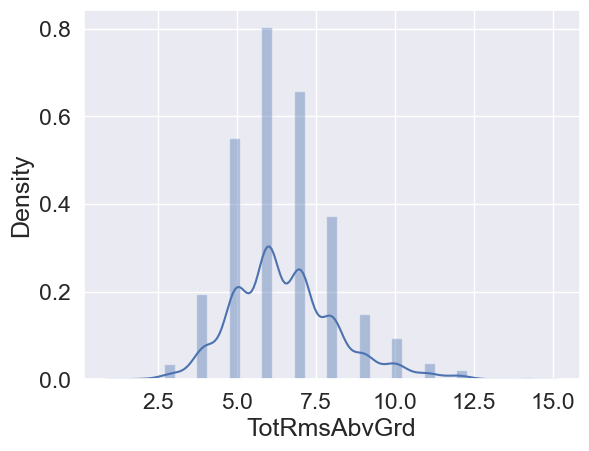

In [43]:
plt.figure()
sns.distplot(House['TotRmsAbvGrd'],color='b')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\2243424247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['OverallQual'],color='b')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

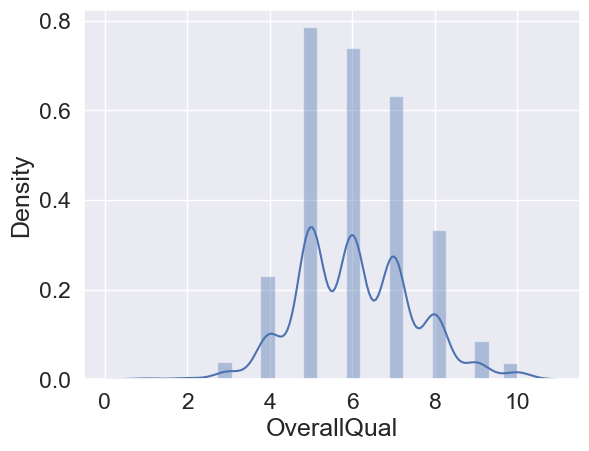

In [44]:
plt.figure()
sns.distplot(House['OverallQual'],color='b')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\1666146226.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['SalePrice'],color='b')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

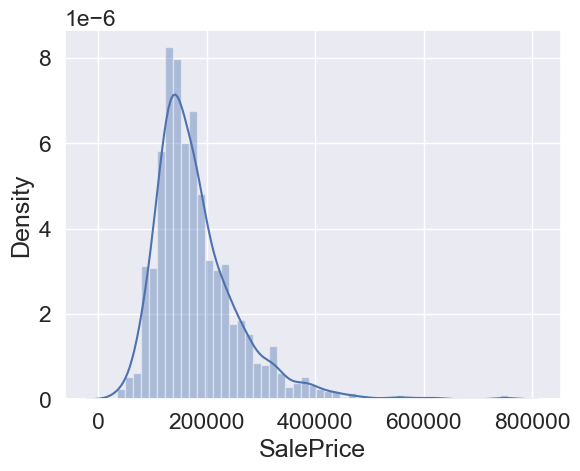

In [45]:
#visualise the dependent variable
plt.figure()
sns.distplot(House['SalePrice'],color='b')
plt.show()

In [46]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\1579363102.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['SalePrice'],color='b')
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

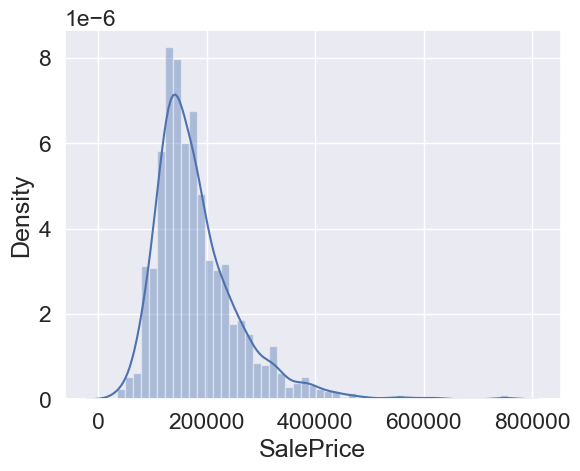

In [47]:
plt.figure()
sns.distplot(House['SalePrice'],color='b')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\528335075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(House['SalePrice'], bins=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

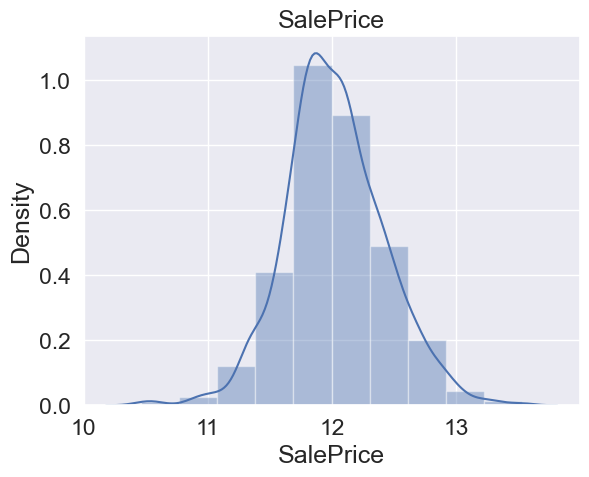

In [48]:
# Visualise the target variable -> SalePrice after transforming the sales price
House['SalePrice'] = np.log1p(House['SalePrice'])
plt.title('SalePrice')
sns.distplot(House['SalePrice'], bins=10)
plt.show()

The dependent variable has been normalised with some residual noise

## 3. Exploratory Data Analysis
Exploratory data analysis of the data set consisted of considerations of how to gain useful insights from the data.


In [49]:
# all numeric (float and int) variables in the dataset
House_num = House.select_dtypes(include=['float64', 'int64'])
House_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1   2          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2   3          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3   4          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4   5          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

In [50]:
# dropping ID from numerical data and from the general data set as it does not add valuable information for the regression model
House = House.drop(['Id'], axis=1)
House_num = House_num.drop(['Id'], axis=1)
House_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008  12.247699
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007  12.109016
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008  12.317171
3          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006  11.849405
4          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008  12.429220

### (i) Visualising Numerical variables

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Figure size 2000x1000 with 0 Axes>

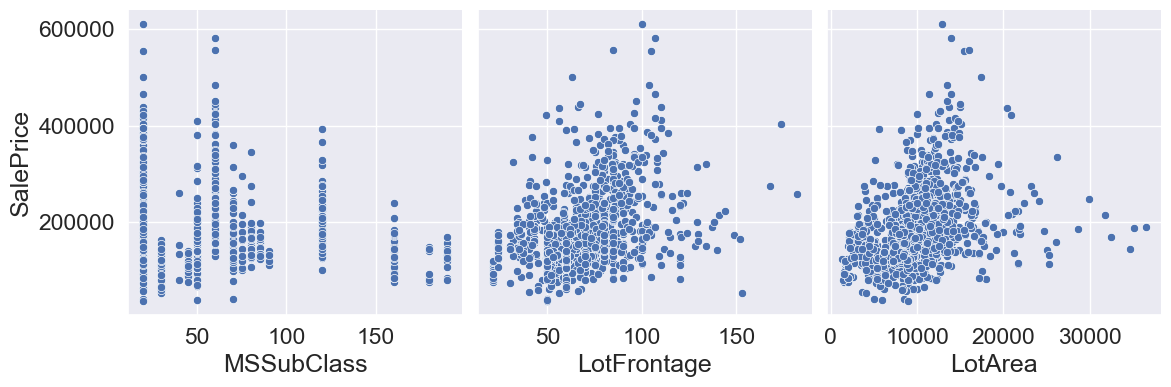

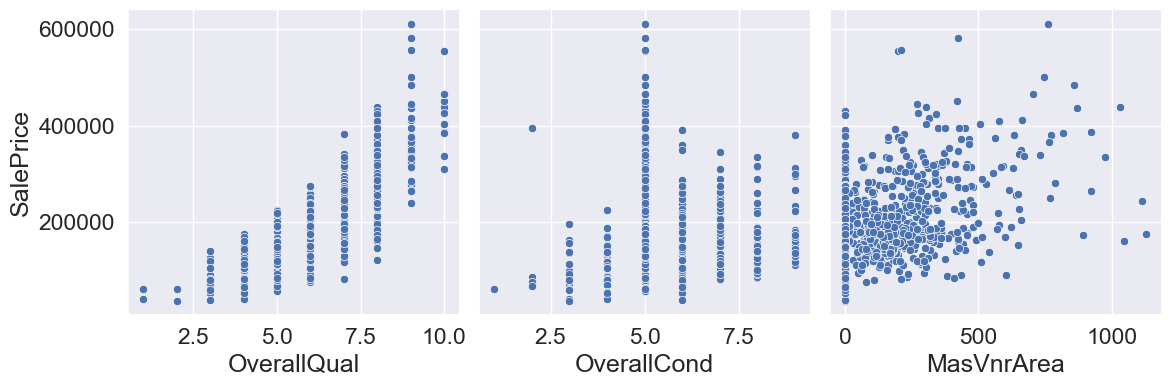

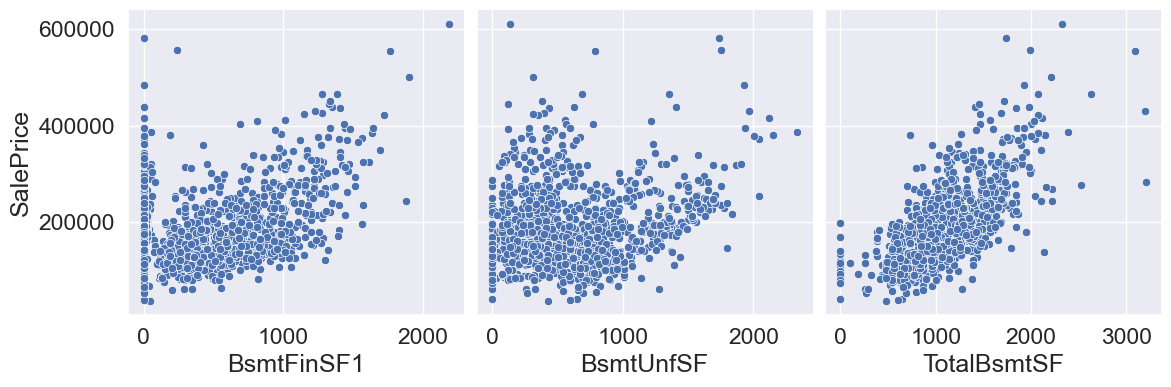

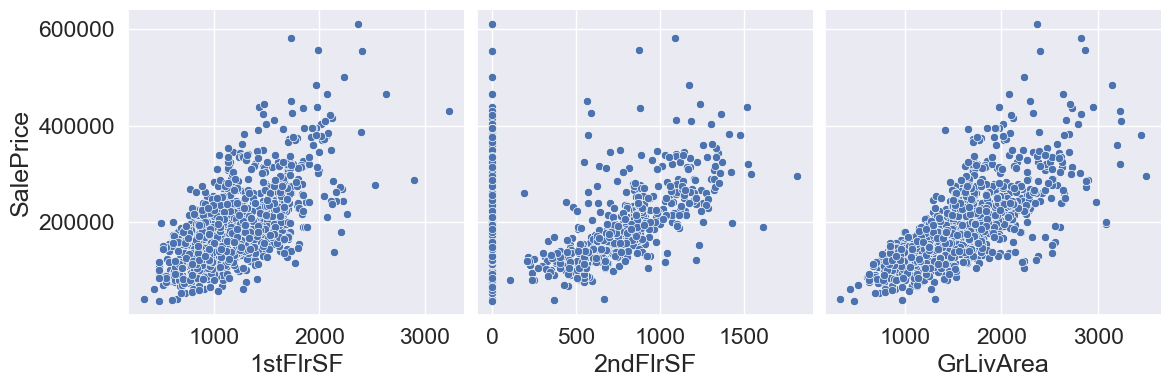

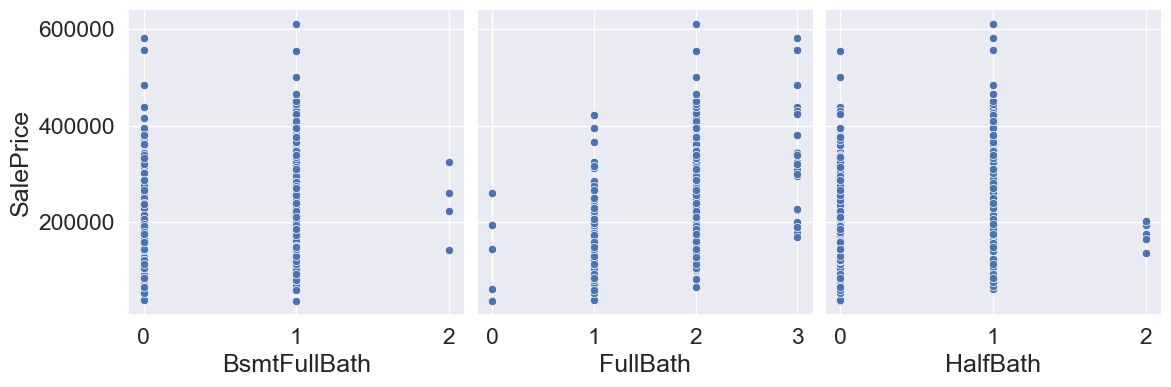

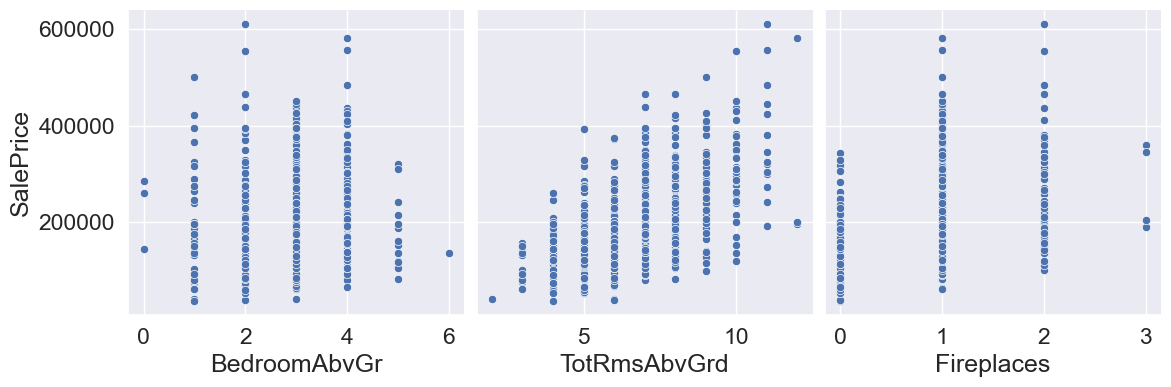

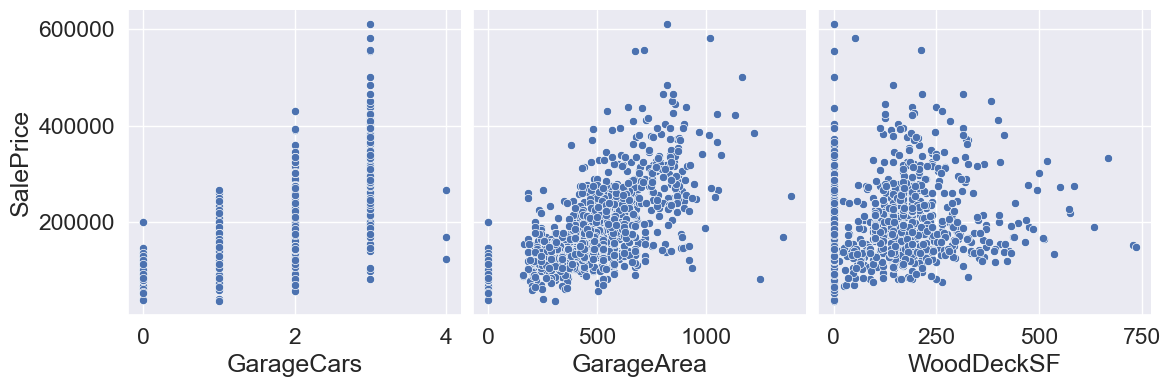

In [51]:
# Check the numerical values using pairplots
plt.figure(figsize=(20,10))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


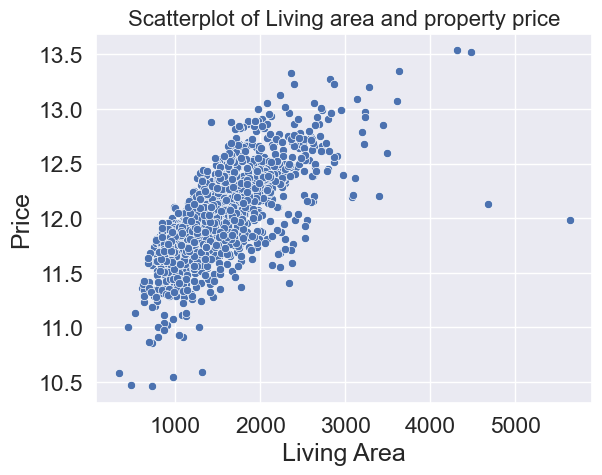

In [52]:
#scatter plot for temperature to count
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=House)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

### (ii) Identifying correlations

In [53]:
# correlation matrix
cor = House_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.023573   -0.069836   -0.065649  -0.140759    -0.238518 -0.251758  0.307886   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.081396   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037    -0.026030 -0.013585 -0.021407  -0.073959
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   0.116685      0.083348    0.178469    0.214367    0.042463   0.124098     0.363472  0.413773  0.072388   0.368007      0.090343     -0.006979  0.180534  0.047222      0.236840     -0.004905      0.320518    0.233221     0.062996    0.269539    0.323511    0.075542     0.137014       0.010287     0.037655  0.010451  0.006380   0.335292
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   0.014228      0.013788    0.103321    0.214103    0.111170  -0.002618     0.260833  0.299475  0.050986   0.263116      0.158155      0.048046  0.126031  0.014259      0.119690     -0.017784      0.190015    0.271364    -0.025865    0.154871    0.180403    0.171698     0.084774      -0.018340     0.043160  0.001205 -0.014261   0.257320
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   0.572323      0.550684    0.407252    0.239666   -0.059119   0.308159     0.537808  0.476224  0.295493   0.593007      0.111098     -0.040150  0.550600  0.273458      0.101676     -0.183882      0.427452    0.396765     0.514231    0.600671    0.562022    0.238923     0.308819      -0.113937     0.064886  0.070815 -0.027347   0.817185
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000  -0.375983      0.073741   -0.125694   -0.046231    0.040229  -0.136841    -0.171098 -0.144203  0.028942  -0.079686     -0.054942      0.117821 -0.194149 -0.060769      0.012980     -0.087001     -0.057583   -0.023820    -0.306276   -0.185758   -0.151521   -0.003334    -0.032589       0.070356     0.054811 -0.003511  0.043950  -0.036868
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   1.000000      0.592855    0.311600    0.249503   -0.049107   0.149040     0.391452  0.281986  0.010308   0.199010      0.187599     -0.038162  0.468271  0.242656     -0.070651     -0.174800      0.095589    0.147716     0.777182    0.537850    0.478954    0.224880     0.188686      -0.387268    -0.050364  0.012398 -0.013618   0.586570
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   0.592855      1.000000    0.176529    0.128451   -0.067759   0.181133     0.291066  0.240379  0.140024   0.287389      0.119470     -0.012337  0.439046  0.183331     -0.040581     -0.149598      0.191740    0.112581     0.616444    0.420622    0.371600    0.205726     0.226298      -0.193919    -0.038740  0.021490  0.035743   0.565608
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   0.311600      0.176529    1.000000    0.261256   -0.071330   0.113862     0.360067  0.339850  0.173800   0.388052      0.083010      0.027403  0.272999  0.199108      0.102775     -0.038450      0.279568    0.247015     0.244444    0.361945    0.370884    0.159991     0.122528      -0.109907     0.062248 -0.006723 -0.008317   0.426776
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   0.249503      0.128451    0.261256    1.000000   -0.050117  -0.495251     0.522396  0.445863 -0.137079   0.208171      0.649212      0.067418  0.058543  0.004262     -0.107355     -0.081007      0.044316    0.260

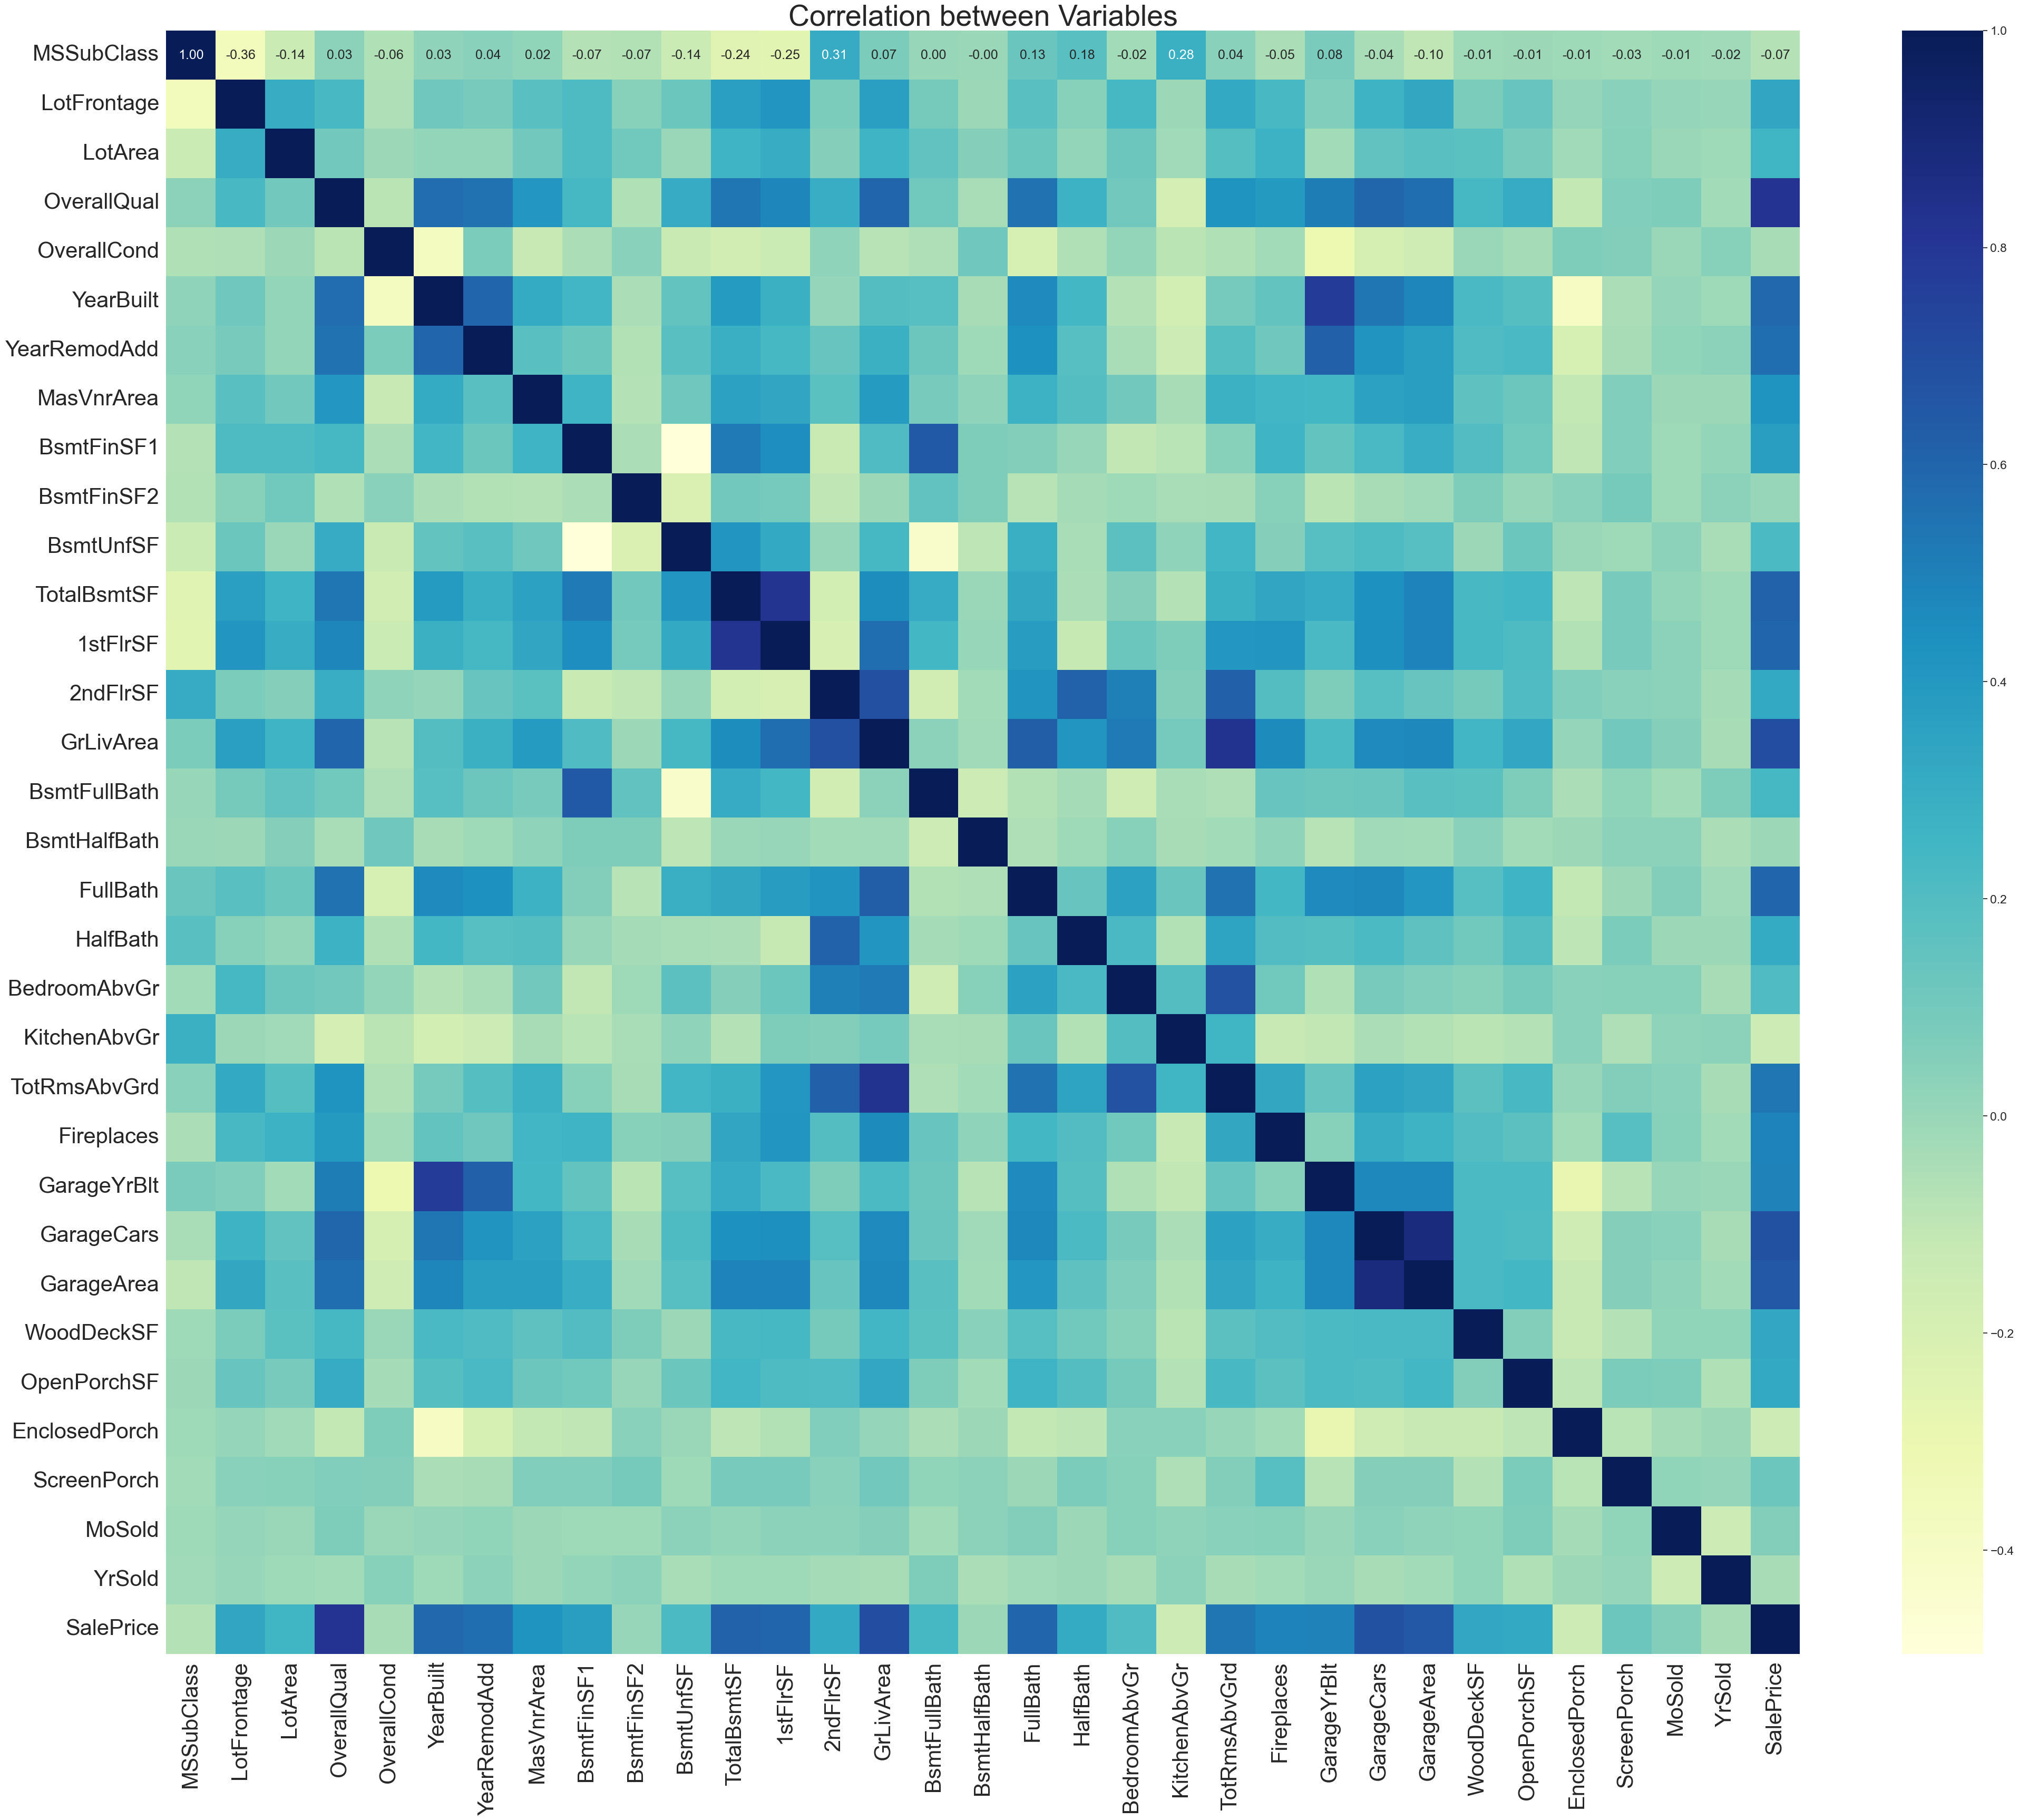

In [54]:
# plotting correlations on a heatmap
plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

## (4) Data preparation


## (i) Creating dummy variables

In [59]:
#Check which columns containg categorical data
House_categorical=House.select_dtypes(include=['object'])
House_categorical.head()


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ         NaN     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd    BrkFace        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y    NaN   NaN         NaN       WD       Abnorml
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y    NaN   NaN         NaN       WD        Normal

In [61]:
# Convert categorical value into Dummy variables (one hot encoding)
House_dummies=pd.get_dummies(House_categorical,drop_first=True)
House_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0        False        False         True        False         True       False         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                 False             False             True            False            False            False            False            False            False             False             True            False   
1        False        False         True        False         True       False         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                  True              True            False            False            False            False            False            False            False             False             True            False   
2        False        False         True        False         True       False         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                 False             False             True            False            False            False            False            False            False             False             True            False   
3        Fa

In [62]:
House_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0        False        False         True        False         True       False         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                 False             False             True            False            False            False            False            False            False             False             True            False   
1        False        False         True        False         True       False         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                  True              True            False            False            False            False            False            False            False             False             True            False   
2        False        False         True        False         True       False         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False               False                False                 False                 False                 False                False                 False             False             True            False            False            False            False            False            False             False             True            False   
3        Fa

### (ii) Scaling Data

In [64]:
# drop categorical variables from the dataset and save as predictor variable X
X= House.drop(list(House_categorical.columns), axis=1)

In [65]:
#removing response variable from the set
X=X.drop(['SalePrice'], axis=1)

In [66]:
y = House['SalePrice']

In [67]:
# concat dummy variables with X
X = pd.concat([X, House_dummies], axis=1)

In [68]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       854       1710             1             0         2         1             3             1           0           2           0           61              0            0       2    2008        False        False         True        False         True       False         False         False          True            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262         0       1262             0             1         2         0             3             1           1           2         298            0              0            0       5    2007        False        False         True        False         True       False         False         False          True            False            False             True             False              False           True          False             False          False          False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       866       1786             1             0         2         1             3             1           1           2           0           42              0            0       9    2008        False        False         True        False         True       False         False         False         False            False            False             True             False              False          False          False              True          False          False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False                 False                False                 False                 False                 False   
3          70         60.0 

In [69]:
# storing column names in cols (the df is converted to a numpy array)
# Standardize a dataset along any axis
# Center to the mean and component-wise scale to unit variance.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=236)

In [70]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0    0.073375    -0.220875 -0.207142     0.651479    -0.517200   1.050994      0.878668    0.514104    0.575425   -0.288653  -0.944591    -0.459303  1.161852   0.370333      1.107810     -0.241061  0.789741  1.227585      0.163779     -0.211454   -0.951226    0.311725   -0.752176     0.216503      -0.359325    -0.270208 -1.599111  0.138777    -0.215859    -0.105263     0.518133    -0.418955     0.064238   -0.169981     -0.169981     -0.083045      0.760512        -0.188311           -0.159         0.337126          -0.02618          -0.262324      -0.182380      -0.052414          0.622762      -0.215859      -0.094785             -0.037037            -0.105263             -0.203395             -0.139832              2.955221             -0.190252             -0.271163             -0.239176             -0.16125              -0.10854             -0.186352           -0.426833             -0.078757            -0.229416             -0.169981             -0.235958             -0.289638   
1   -0.872563     0.460320 -0.091886    -0.071836     2.179628   0.156734     -0.429577   -0.570750    1.171992   -0.288653  -0.641228     0.466465 -0.795163  -0.482512     -0.819964      3.948809  0.789741 -0.761621      0.163779     -0.211454    0.600495    0.311725    1.626195    -0.704483      -0.359325    -0.270208 -0.489110 -0.614439    -0.215859    -0.105263     0.518133    -0.418955     0.064238   -0.169981     -0.169981     -0.083045      0.760512        -0.188311           -0.159         0.337126          -0.02618          -0.262324       5.483049      -0.052414         -1.605749      -0.215859      -0.094785             -0.037037            -0.105263             -0.203395             -0.139832             -0.338384             -0.190252             -0.271163             -0.239176             -0.16125              -0.10854             -0.186352           -0.426833             -0.078757            -0.229416             -0.169981             -0.235958             -0.289638   
2    0.073375    -0.084636  0.073480     0.651479    -0.517200   0.984752      0.830215    0.325915    0.092907   -0.288653  -0.301643    -0.313369  1.189351   0.515013      1.107810     -0.241061  0.789741  1.227585      0.163779     -0.211454    0.600495    0.311725   -0.752176    -0.070361      -0.359325    -0.270208  0.990891  0.138777    -0.215859    -0.105263     0.518133    -0.418955     0.064238   -0.169981     -0.169981     -0.083045     -1.314904        -0.188311           -0.159         0.337126          -0.02618          -0.262324      -0.182380      -0.052414          0.622762      -0.215859      -0.094785             -0.037037            -0.105263             -0.203395             -0.139832              2.955221             -0.190252             -0.271163             -0.239176             -0.16125              -0.10854             -0.186352           -0.426833             -0.078757            -0.229416             -0.169981             -0.235958             -0.289638   
3    0.

## (iii) Spliting the dataset
The data set is divided into two subsets: the training set (70%) to train the model and a test set (30%) to test the trained model. The aim is to create a training set that is representative of the data set as a whole. To do this, the rows are selected randomly from the data.

In [71]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

## (5) Feature Engineering
### Data modelling and evaluation
The aims of this section are:
- create linear regression model using no feature elimination
- use ridge and lasso 
- report the final model

### (i) Linear Model

In [72]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)


LinearRegression()

In [73]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-4422430856.241857
[-1.92250909e-02  8.19930131e-03  3.35151732e-02  5.56508693e-02
  4.14122865e-02  6.65130251e-02  2.23438481e-02  2.90306572e-03
 -1.45242159e+11 -5.13713167e+10 -1.40710325e+11  1.39703519e+11
 -6.02902895e-03  1.48281892e-01  1.16407566e-02 -3.00108645e-04
  3.51269795e-03  2.78220953e-04  6.96850501e-03 -1.25538264e-02
 -4.70975614e-03  3.41312210e-02  1.07331739e-02  5.38730192e-03
  7.09764536e-03  9.27602851e-03  1.59905018e-03 -2.32243888e-03
  9.30207707e-02  4.60239624e-02  1.81048933e-01  1.35983946e-01
  5.47024165e-03  1.75094604e-03  2.37560272e-03 -1.86920166e-03
  3.46469879e-03  2.47192383e-03  3.08990479e-04  8.06045532e-03
 -2.64406204e-03  7.89451599e-03 -7.47323036e-03  3.62396240e-05
 -3.07178497e-03  3.98254395e-03 -2.05345154e-02  2.84385681e-03
 -1.11389160e-03  1.88095570e-02  1.00808144e-02  6.31332397e-03
  3.32298279e-02 -4.07886505e-03  2.47573853e-03  1.10054016e-02
 -1.25732422e-02 -1.47199631e-03  1.21078491e-02  1.54495239e-04
  6.37

In [74]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.957947114128733
r2 test:  -2.2566910762118213e+23
rss1:  6.749075369625941
rss2:  1.6263432757141841e+25
MSE train:  0.006610259911484761
MSE test:  3.7131125016305575e+22


The model using all of the features is highly overfitting. R2 is negative only when the chosen model does not follow the trend of the data, that is, the fit is worse than a horizontal line. This model is highly problematic. It shows a high score in the training data, but this will be due to the model learning the data and overfitting on the training data.In the following step, ridge and lasso are applied to compare the result.

### (ii) Ridge and Lasso Regression


#### (a) Ridge Regression

In [76]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 7.0}
-0.08804345073787097


In [78]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.07464817e-02,  7.53092681e-03,  2.32472177e-02,  5.82243390e-02,
        3.45397820e-02,  2.44761601e-02,  2.44694406e-02,  5.89899435e-03,
        2.55754870e-02,  6.32332061e-03,  1.07190663e-02,  3.97109505e-02,
        1.93924048e-02,  7.97904512e-02,  1.59508335e-02, -9.86004648e-04,
        1.90397684e-02,  1.08222378e-02,  1.36017106e-02, -9.93884790e-03,
        1.25113676e-02,  3.59485441e-02,  1.24433691e-02,  5.70806424e-03,
        2.64285136e-03,  8.64231852e-03, -3.90196730e-04, -3.43469264e-03,
        1.09009423e-02,  6.66322872e-03,  2.43971275e-02,  9.81664266e-03,
        6.09818598e-03,  4.06474147e-03,  2.55013662e-03, -4.78362952e-03,
        8.71815577e-04,  2.92749171e-03,  6.04373488e-04,  6.10004738e-03,
       -2.68798508e-03,  9.22954627e-03, -8.33589281e-03, -2.00066002e-03,
       -3.26339263e-03,  2.40312608e-03, -9.95837396e-03, -7.80331965e-04,
       -6.02681577e-03,  1.34881142e-03,  7.28950448e-03, -1.84861465e-03,
        2.32584673e-02, -

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9471376501786897
0.7783004693887541
8.483888222361532
15.977354837767226
0.008309391011127848
0.03647797908166033


The model is fitting better than the none-regularised version seen above. All features are retained in ridge regression. There is a gap beetween training and testing score. The training score is slightly lower than the regression model before, but the testing score is much better than the previous version.

#### (b) Lasso Regression

In [80]:
lasso = Lasso()
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e-02, tolerance: 1.273e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e-02, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08402422751450159


In [82]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e-02, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [83]:
lasso.coef_

array([-1.24813453e-02,  7.96435415e-03,  2.32287650e-02,  6.38572137e-02,
        4.36572461e-02,  5.93018812e-02,  2.25879080e-02,  3.32812180e-03,
        2.58238355e-02,  2.11790410e-03, -0.00000000e+00,  4.23489103e-02,
        0.00000000e+00,  1.47936003e-01,  1.58265714e-02, -6.81758477e-05,
        3.63875454e-03,  1.52167115e-03,  1.04567912e-03, -1.32572712e-02,
        4.15009417e-03,  3.37170040e-02,  1.02568837e-02,  5.50841893e-03,
        3.03095897e-03,  7.17958668e-03, -0.00000000e+00, -8.51202800e-04,
        3.45941177e-02,  1.83010421e-02,  7.27695825e-02,  4.52076422e-02,
        5.60000348e-03,  1.77718352e-03,  1.01834913e-03, -5.33208009e-04,
        3.41231057e-04, -0.00000000e+00,  0.00000000e+00,  1.86324355e-03,
       -1.94279441e-03,  7.67887684e-03, -4.26446941e-03,  0.00000000e+00,
       -4.08658205e-05,  0.00000000e+00, -1.03503473e-02,  0.00000000e+00,
       -4.16103058e-03,  6.97428485e-03,  8.21743583e-03,  0.00000000e+00,
        2.54334914e-02, -

<Axes: title={'center': 'Modal Coefficients'}>

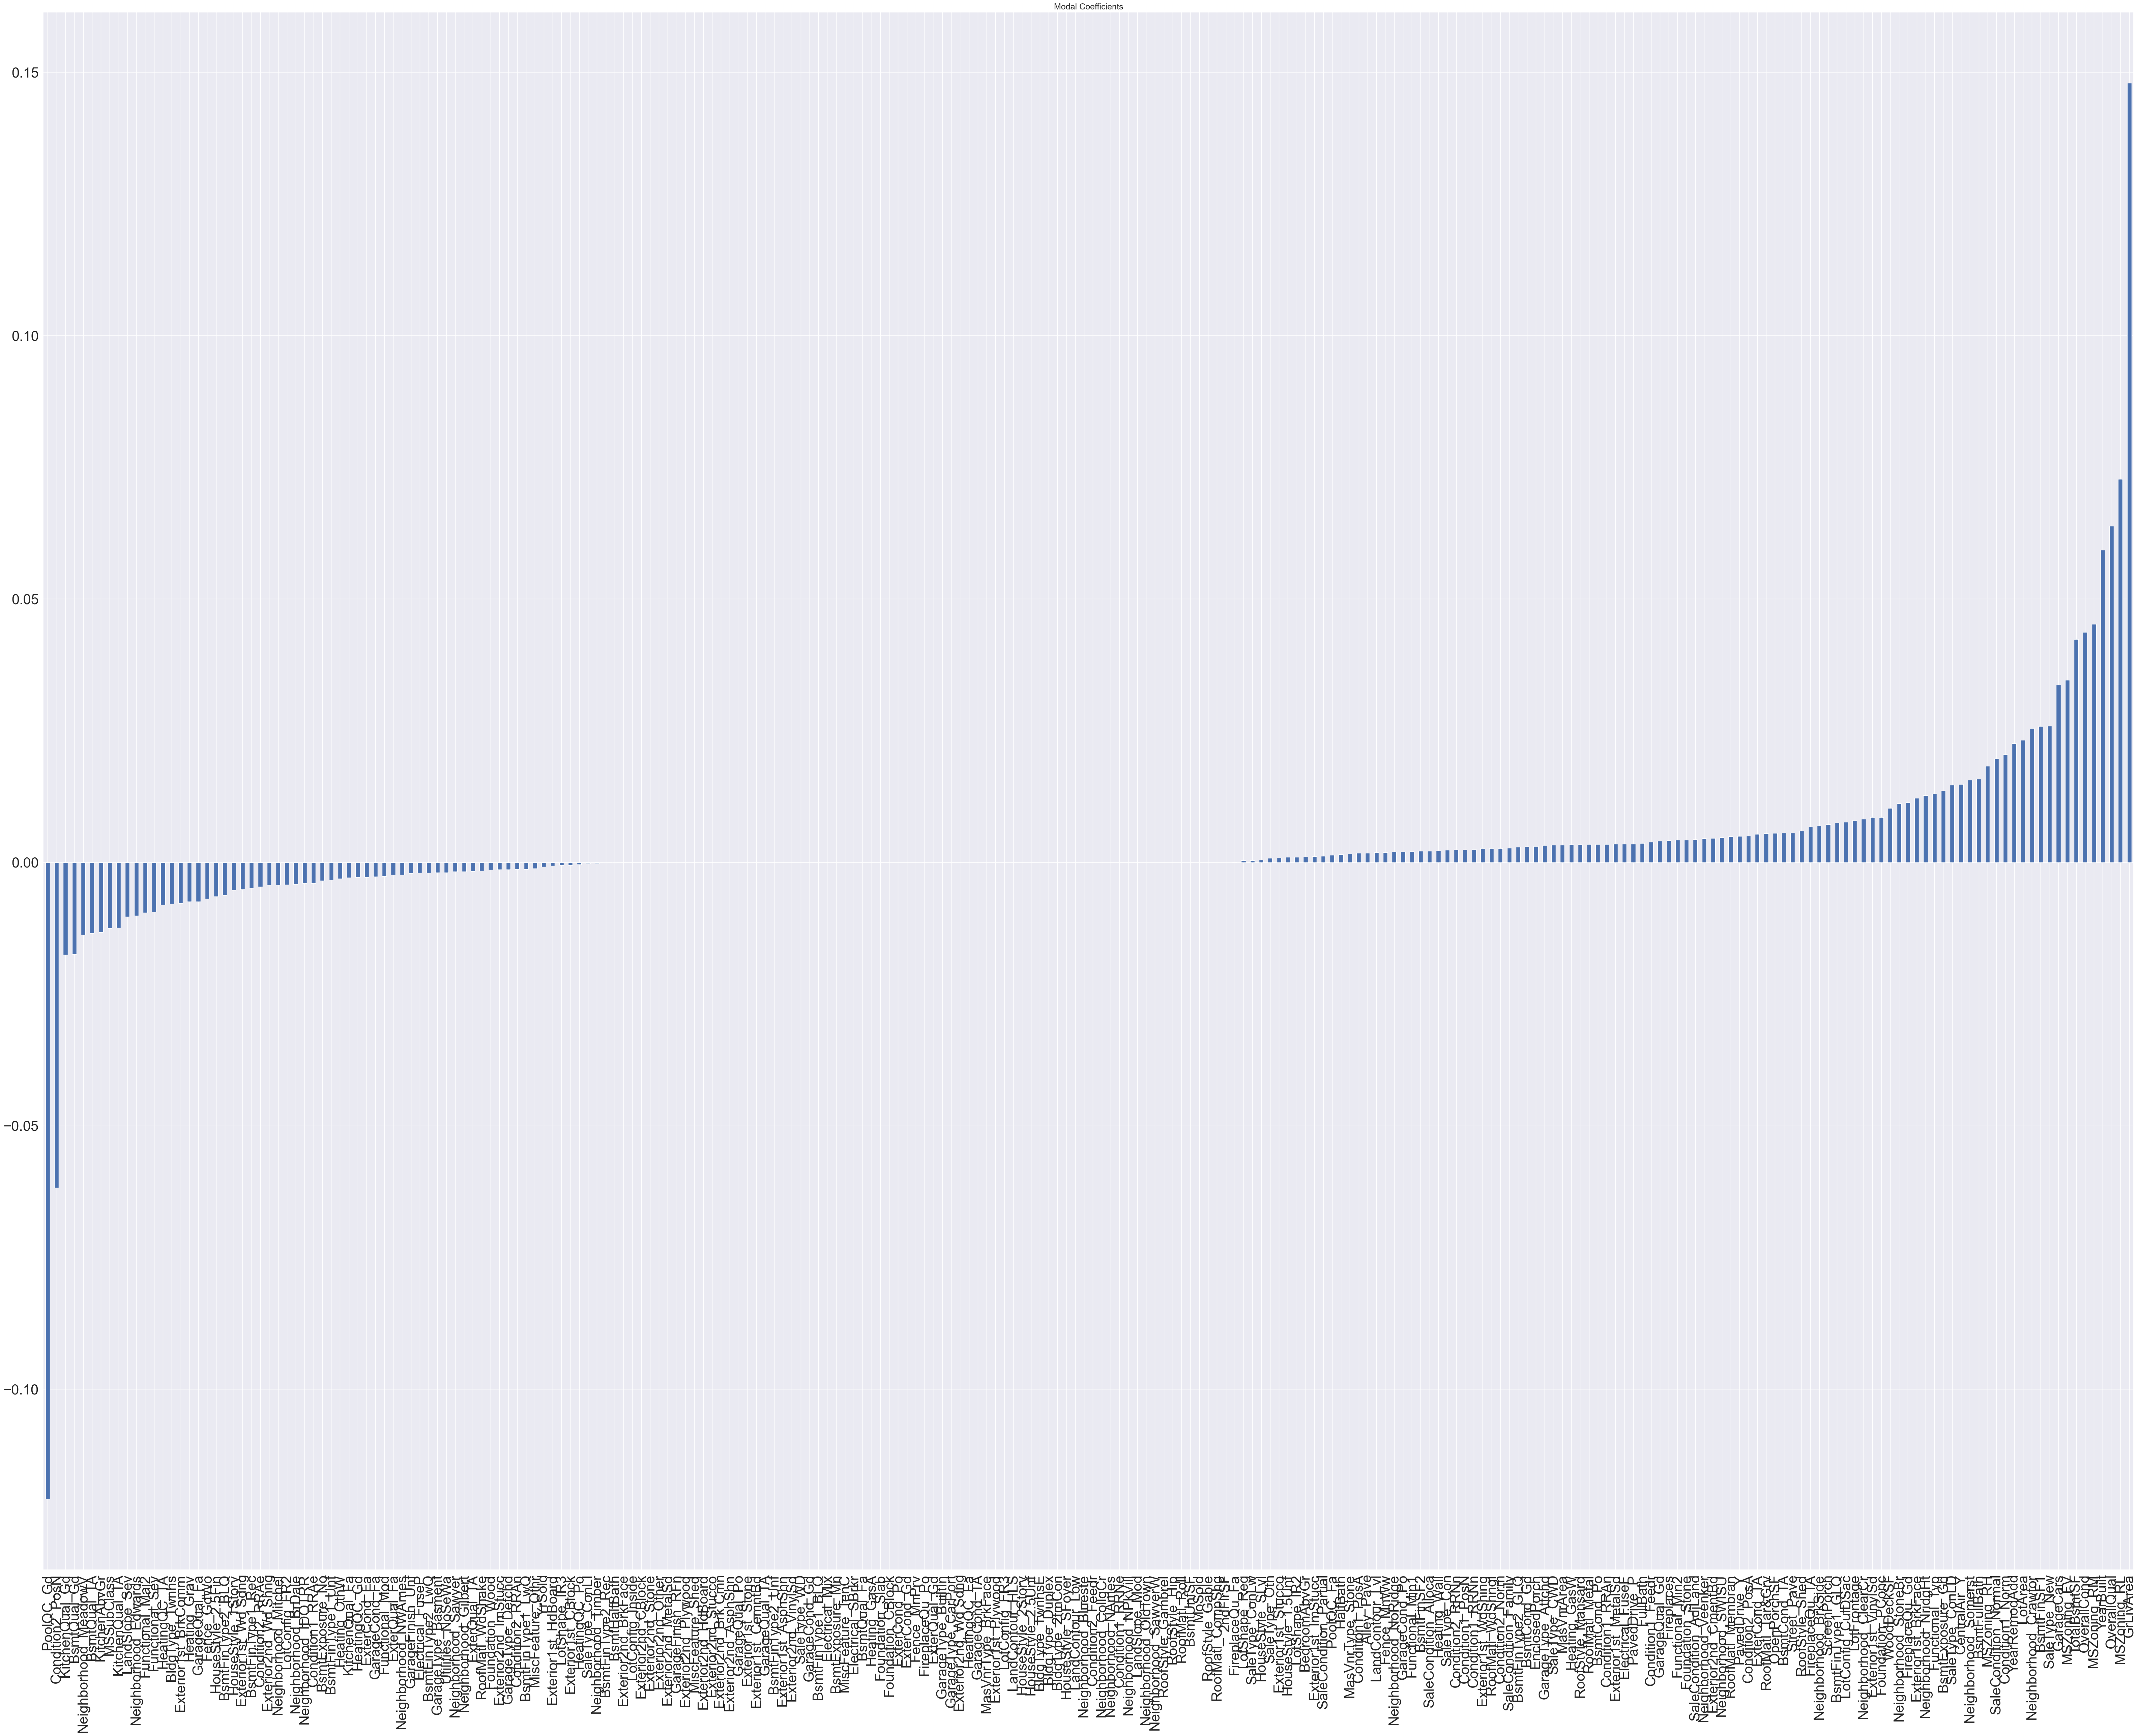

In [85]:
predictors = X_train.columns

coef = pd.Series(lasso.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients', fontsize='30',figsize=(80, 60))

This is a visualisation of the predictor values. The left side denotes negative impact, the right side positive impact. It can be noted that GrLivArea has by far the largest impact.

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9531345777839559
0.6443830389051577
7.5214402106357605
25.62846370524766
0.007366738697978218
0.058512474212894204


In [87]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 'Linear Regression': metric}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.579471e-01          0.947138          0.953135
1   R2 Score (Test)      -2.256691e+23          0.778300          0.644383
2       RSS (Train)       6.749075e+00          8.483888          7.521440
3        RSS (Test)       1.626343e+25         15.977355         25.628464
4       MSE (Train)       8.130350e-02          0.091156          0.085830
5        MSE (Test)       1.926944e+11          0.190992          0.241894

The model with all of the features and no other processing overfits immensely. Both Ridge and Lasso produce a better performing model, with Lasso outperforming Ridge slightly.

#### (C) Predictions and Normality of Residuals

In [94]:
lasso_pred = lasso.predict(X_test)

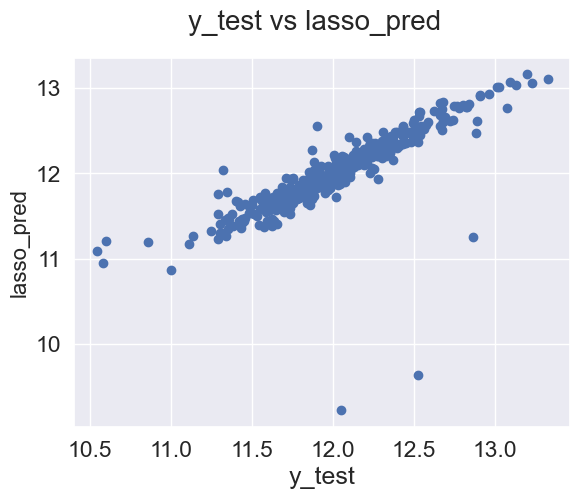

In [95]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\3460825932.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_res,kde=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

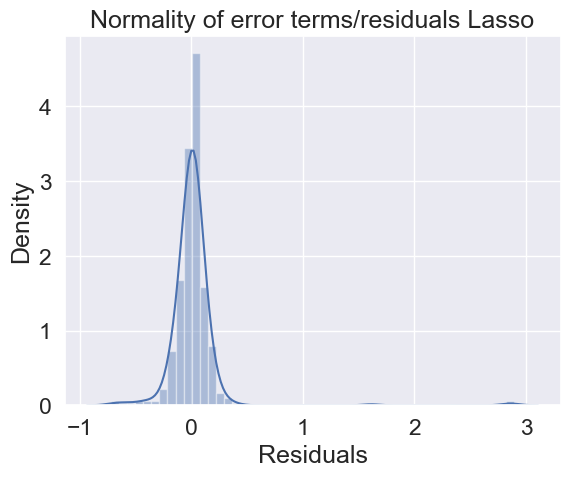

In [96]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

#### (D) Changes in Coefficients

In [97]:
betas = pd.DataFrame(index=X_train.columns)

In [98]:
betas.rows = X_train.columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\4075975573.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [99]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [100]:
betas.head(68)

Linear     Ridge     Lasso
MSSubClass           -1.922509e-02 -0.010746 -0.012481
LotFrontage           8.199301e-03  0.007531  0.007964
LotArea               3.351517e-02  0.023247  0.023229
OverallQual           5.565087e-02  0.058224  0.063857
OverallCond           4.141229e-02  0.034540  0.043657
YearBuilt             6.651303e-02  0.024476  0.059302
YearRemodAdd          2.234385e-02  0.024469  0.022588
MasVnrArea            2.903066e-03  0.005899  0.003328
BsmtFinSF1           -1.452422e+11  0.025575  0.025824
BsmtFinSF2           -5.137132e+10  0.006323  0.002118
BsmtUnfSF            -1.407103e+11  0.010719 -0.000000
TotalBsmtSF           1.397035e+11  0.039711  0.042349
2ndFlrSF             -6.029029e-03  0.019392  0.000000
GrLivArea             1.482819e-01  0.079790  0.147936
BsmtFullBath          1.164076e-02  0.015951  0.015827
BsmtHalfBath         -3.001086e-04 -0.000986 -0.000068
FullBath              3.512698e-03  0.019040  0.003639
HalfBath              2.782210e-04  0.010822  0.001522
BedroomAbvGr          6.968505e-03  0.013602  0.001046
KitchenAbvGr         -1.255383e-02 -0.009939 -0.013257
Fireplaces           -4.709756e-03  0.012511  0.004150
GarageCars            3.413122e-02  0.035949  0.033717
WoodDeckSF            1.073317e-02  0.012443  0.010257
OpenPorchSF           5.387302e-03  0.005708  0.005508
EnclosedPorch         7.097645e-03  0.002643  0.003031
ScreenPorch           9.276029e-03  0.008642  0.007180
MoSold                1.599050e-03 -0.000390 -0.000000
YrSold               -2.322439e-03 -0.003435 -0.000851
MSZoning_FV           9.302077e-02  0.010901  0.034594
MSZoning_RH           4.602396e-02  0.006663  0.018301
MSZoning_RL           1.810489e-01  0.024397  0.072770
MSZoning_RM           1.359839e-01  0.009817  0.045208
Street_Pave           5.470242e-03  0.006098  0.005600
Alley_Pave            1.750946e-03  0.004065  0.001777
LotShape_IR2          2.375603e-03  0.002550  0.001018
LotShape_IR3         -1.869202e-03 -0.004784 -0.000533
LotShape_Reg          3.464699e-03  0.000872  0.000341
LandContour_HLS       2.471924e-03  0.002927 -0.000000
LandContour_Low       3.089905e-04  0.000604  0.000000
LandContour_Lvl       8.060455e-03  0.006100  0.001863
Utilities_NoSeWa     -2.644062e-03 -0.002688 -0.001943
LotConfig_CulDSac     7.894516e-03  0.009230  0.007679
LotConfig_FR2        -7.473230e-03 -0.008336 -0.004264
LotConfig_FR3         3.623962e-05 -0.002001  0.000000
LotConfig_Inside     -3.071785e-03 -0.003263 -0.000041
LandSlope_Mod         3.982544e-03  0.002403  0.000000
LandSlope_Sev        -2.053452e-02 -0.009958 -0.010350
Neighborhood_Blueste  2.843857e-03 -0.000780  0.000000
Neighborhood_BrDale  -1.113892e-03 -0.006027 -0.004161
Neighborhood_BrkSide  1.880956e-02  0.001349  0.006974
Neighborhood_ClearCr  1.008081e-02  0.007290  0.008217
Neighborhood_CollgCr  6.313324e-03 -0.001849  0.000000
Neighborhood_Crawfor  3.322983e-02  0.023258  0.025433
Neighborhood_Edwards -4.078865e-03 -0.015975 -0.010143
Neighborhood_Gilbert  2.475739e-03 -0.005405 -0.001728
Neighborhood_IDOTRR   1.100540e-02 -0.013217 -0.004027
Neighborhood_MeadowV -1.257324e-02 -0.017426 -0.013796
Neighborhood_Mitchel -1.471996e-03 -0.005379 -0.004306
Neighborhood_NAmes    1.210785e-02 -0.002243  0.000000
Neighborhood_NPkVill  1.544952e-04 -0.001716  0.000000
Neighborhood_NWAmes   6.370544e-04 -0.003111 -0.002368
Neighborhood_NoRidge  6.482363e-03  0.009153  0.002030
Neighborhood_NridgHt  1.489639e-02  0.017799  0.012735
Neighborhood_OldTown  1.689529e-02 -0.008895 -0.000000
Neighborhood_SWISU    1.141810e-02  0.004419  0.004689
Neighborhood_Sawyer   1.941681e-03 -0.005026 -0.001738
Neighborhood_SawyerW  5.761862e-03  0.001461  0.000000
Neighborhood_Somerst  1.749802e-02  0.014018  0.015671

In [101]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\103727110.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


Lasso
GrLivArea              0.147936
MSZoning_RL            0.072770
OverallQual            0.063857
YearBuilt              0.059302
MSZoning_RM            0.045208
OverallCond            0.043657
TotalBsmtSF            0.042349
MSZoning_FV            0.034594
GarageCars             0.033717
SaleType_New           0.025906
BsmtFinSF1             0.025824
Neighborhood_Crawfor   0.025433
LotArea                0.023229
YearRemodAdd           0.022588
Condition1_Norm        0.020466
SaleCondition_Normal   0.019664
MSZoning_RH            0.018301
BsmtFullBath           0.015827
Neighborhood_Somerst   0.015671
CentralAir_Y           0.014833
SaleType_ConLD         0.014683
BsmtExposure_Gd        0.013577
Functional_Typ         0.013021
Neighborhood_NridgHt   0.012735
Exterior1st_BrkFace    0.012215
FireplaceQu_Gd         0.011364
Neighborhood_StoneBr   0.011194
WoodDeckSF             0.010257
Foundation_PConc       0.008577
Exterior1st_VinylSd    0.008528
Neighborhood_ClearCr   0.008217
LotFrontage            0.007964
LotConfig_CulDSac      0.007679
BsmtFinType1_GLQ       0.007497
ScreenPorch            0.007180
Neighborhood_BrkSide   0.006974
FireplaceQu_TA         0.006763
RoofStyle_Shed         0.005957
Street_Pave            0.005600
BsmtCond_TA            0.005572
OpenPorchSF            0.005508
RoofMatl_Tar&Grv       0.005495
ExterCond_TA           0.005354
Condition2_PosA        0.005047
PavedDrive_Y           0.004992
RoofMatl_Membran       0.004909
Neighborhood_SWISU     0.004689
Exterior2nd_CmentBd    0.004610
Neighborhood_Veenker   0.004497
SaleCondition_AdjLand  0.004349
Foundation_Stone       0.004284
Functional_Min2        0.004282
Fireplaces             0.004150
GarageQual_Gd          0.004058
Condition1_Feedr       0.003858
FullBath               0.003639
PavedDrive_P           0.003515
Electrical_FuseF       0.003497
Exterior1st_MetalSd    0.003488
Condition1_RRAn        0.003452
BsmtCond_Po            0.003452
RoofMatl_Metal         0.003449
RoofStyle_Mansard      0.003374
Heating_GasW           0.003332
MasVnrArea             0.003328
SaleType_CWD           0.003273
GarageType_Attchd      0.003207
EnclosedPorch          0.003031
BsmtCond_Gd            0.002995
BsmtFinType2_GLQ       0.002941
SaleCondition_Family   0.002734
Condition2_Norm        0.002670
RoofMatl_WdShngl       0.002662
Exterior1st_WdShing    0.002643
Condition1_RRNn        0.002453
Condition1_PosN        0.002400
Condition2_RRNn        0.002389
SaleType_Con           0.002346
Heating_Wall           0.002199
SaleCondition_Alloca   0.002124
BsmtFinSF2             0.002118
Functional_Min1        0.002086
GarageCond_Po          0.002047
Neighborhood_NoRidge   0.002030
Fence_MnWw             0.001869
LandContour_Lvl        0.001863
Alley_Pave             0.001777
Condition1_PosA        0.001744
MasVnrType_Stone       0.001664
HalfBath               0.001522
PoolQC_Fa              0.001372
SaleCondition_Partial  0.001204
Exterior1st_ImStucc    0.001149
BedroomAbvGr           0.001046
LotShape_IR2           0.001018
HouseStyle_1.5Unf      0.000984
Exterior1st_Stucco     0.000857
SaleType_Oth           0.000833
HouseStyle_SLvl        0.000495
SaleType_ConLw         0.000366
LotShape_Reg           0.000341
FireplaceQu_Fa         0.000046
MiscFeature_TenC       0.000000
Foundation_CBlock     -0.000000
ExterCond_Gd          -0.000000
ExterCond_Po           0.000000
Foundation_Slab        0.000000
ExterQual_Gd           0.000000
SaleType_WD            0.000000
MasVnrType_BrkFace    -0.000000
Exterior2nd_Wd Sdng    0.000000
Exterior2nd_VinylSd    0.000000
MiscFeature_Shed      -0.000000
Fence_MnPrv            0.000000
Heating_GasA           0.000000
GarageCond_TA          0.000000
BsmtFinType2_Unf       0.000000
HeatingQC_Fa          -0.000000
Electrical_Mix         0.000000
BsmtFinType1_BLQ      -0.000000
BsmtExposure_Mn       -0.000000
Electrical_SBrkr       0.000000
FireplaceQu_Po        -0.000000
Exterior2nd_Stone      0.000000
GarageType_BuiltIn    -0.0

#### (E) Evaluation of the model

The model shows that there are some variables that are highly relevant to the sales price.
Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	| Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| GarageArea	| Size of garage in square feet|

## (6) Alternate Approach

### (i) Recursive feature elimination (RFE)
Feature selection refers to selecting a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Here, the model starts by including all variables, and the model is reduced in complexity by dropping variables one by one, and rebuilding the model after each dropped variable to observe the impact of the dropped variables.

In [102]:
y_train_values=y_train.values.reshape(-1,1)

In [103]:
rfe = RFE(lm,n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [104]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 21),
 ('LotFrontage', False, 40),
 ('LotArea', False, 12),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearBuilt', False, 2),
 ('YearRemodAdd', False, 10),
 ('MasVnrArea', False, 144),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 141),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('BsmtHalfBath', False, 193),
 ('FullBath', False, 103),
 ('HalfBath', False, 200),
 ('BedroomAbvGr', False, 90),
 ('KitchenAbvGr', False, 31),
 ('Fireplaces', False, 153),
 ('GarageCars', False, 11),
 ('WoodDeckSF', False, 51),
 ('OpenPorchSF', False, 94),
 ('EnclosedPorch', False, 74),
 ('ScreenPorch', False, 69),
 ('MoSold', False, 164),
 ('YrSold', False, 131),
 ('MSZoning_FV', False, 6),
 ('MSZoning_RH', False, 8),
 ('MSZoning_RL', False, 5),
 ('MSZoning_RM', False, 7),
 ('Street_Pave', False, 105),
 ('Alley_Pave', False, 162),
 ('LotShape_IR2', False, 150),
 ('LotShape_IR3', Fal

In the list above, it is noticable that all columns where RFE support is true have equal scores of 1. This means that they could be considered useful features for the model. The usefulness may change throughout the model building progress. This is because RFE aims to remove the worst performing feature. 

In [105]:
# show supported features
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Gd', 'SaleType_New', 'SaleCondition_Partial'], dtype='object')

In [106]:
# columns were rfe is false
colfls=X_train.columns[~rfe.support_]
colfls

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=206)

In [107]:
#Check the shape of train and test
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)
print(X_test_rfe.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 30)
(438, 30)
(1021,)
(438,)


In [108]:
y_train=y_train.values.reshape(-1,1)

In [109]:
y_train.shape

(1021, 1)

In [110]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

In [111]:
# running the model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:54:23   Log-Likelihood:                 371.36
No. Observations:                1021   AIC:                            -696.7
Df Residuals:                     998   BIC:                            -583.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.9935      0.005   2252.545      0.000      11.983      12.004
OverallQual               0.1841      0.007     24.896      0.000       0.170       0.199
BsmtFinSF1                0.0603      0.004     15.392      0.000       0.053       0.068
BsmtFinSF2                0.0089      0.005      1.784      0.075      -0.001       0.019
BsmtUnfSF                -0.0023      0.004     -0.570      0.569      -0.010       0.006
TotalBsmtSF               0.0637      0.005     13.907      0.000       0.055       0.073
GrLivArea                 0.1349      0.007     19.674      0.000       0.121       0.148
RoofMatl_CompShg         -0.0388      0.003    -12.657      0.000      -0.045      -0.033
RoofMatl_Membran         -0.0020      0.004     -0.442      0.658      -0.011       0.007
RoofMatl_Metal           -0.0029      0.004     -0.661      0.509      -0.012       0.006
RoofMatl_Roll            -0.0085      0.005     -1.869      0.062      -0.017       0.000
RoofMatl_Tar&Grv         -0.0223      0.005     -4.410      0.000      -0.032      -0.012
RoofMatl_WdShake         -0.0183      0.005     -3.902      0.000      -0.028      -0.009
RoofMatl_WdShngl         -0.0135      0.005     -2.683      0.007      -0.023      -0.004
Exterior1st_AsphShn       0.1535      0.003     45.774      0.000       0.147       0.160
Exterior1st_CBlock       -0.0013      0.002     -0.568      0.570      -0.006       0.003
Exterior2nd_AsphShn      -0.2741      0.002   -141.238      0.000      -0.278      -0.270
Exterior2nd_CBlock       -0.0013      0.002     -0.568      0.570      -0.006       0.003
Exterior2nd_Other        -0.3140      0.000  -2252.545      0.000      -0.314      -0.314
ExterCond_Po             -0.3140      0.000  -2252.545      0.000      -0.314      -0.314
GarageQual_Fa             0.0005      0.014      0.038      0.970      -0.027       0.028
GarageQual_Gd             0.0110      0.009      1.194      0.233      -0.007       0.029
GarageQual_Po             0.0003      0.008      0.038      0.970      -0.015       0.015
GarageQual_TA             0.0189      0.016      1.171      0.242      -0.013       0.051
GarageCond_Fa            -0.0125      0.015     -0.812      0.417      -0.043       0.018
GarageCond_Gd            -0.0028      0.009     -0.306      0.760      -0.021       0.015
GarageCond_Po            -0.0062      0.009     -0.662      0.508      -0.025       0.012
GarageCond_TA            -0.0026      0.018     -0.144      0.885      -0.038       0.033
PoolQC_Gd                -0.1565      0.008    -19.186      0.000      -0.173      -0.141
SaleType_New              0.0620      0.003     20.596      0.000       0.056       0.068
SaleCondition_Partial    -0.0268      0.003     -9.008      0.000      -0.033      -0.021
=======================

In [112]:
#Drop the constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

### (ii) Checking VIF and rebuilding model
The Variance Inflation Factor or VIF, provides a basic idea about how much the feature variables are correlated with each other. It is an important parameter, and high values should be dropped.

In [114]:
# calculate the VIF scores
# function that creates a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_VIF_table(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_VIF_table(X_train_rfe)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Features   VIF
15    Exterior2nd_AsphShn   inf
14     Exterior1st_CBlock   inf
28           SaleType_New   inf
27              PoolQC_Gd   inf
26          GarageCond_TA   inf
25          GarageCond_Po   inf
24          GarageCond_Gd   inf
23          GarageCond_Fa   inf
22          GarageQual_TA   inf
21          GarageQual_Po   inf
20          GarageQual_Gd   inf
19          GarageQual_Fa   inf
16     Exterior2nd_CBlock   inf
1              BsmtFinSF1   inf
29  SaleCondition_Partial   inf
13    Exterior1st_AsphShn   inf
12       RoofMatl_WdShngl   inf
11       RoofMatl_WdShake   inf
10       RoofMatl_Tar&Grv   inf
9           RoofMatl_Roll   inf
8          RoofMatl_Metal   inf
7        RoofMatl_Membran   inf
6        RoofMatl_CompShg   inf
4             TotalBsmtSF   inf
3               BsmtUnfSF   inf
2              BsmtFinSF2   inf
0             OverallQual  1.98
5               GrLivArea  1.70
17      Exterior2nd_Other  0.00
18           ExterCond_Po  0.00

It can be observed that there are many features with a very, very high VIF value. Looking at the list of features, this seems to not be surprising, because each area of the house is described with multiple variables: despite dropping certain variables earlier, there are still 6 left that all describe the garage. These did not have a strong correlation apparent in the heatmap created in the EDA phase.Here, it becomes apparent why RFE set to a low value, such as selecting only 10 features will not be appropriate for the given data set. 

In [115]:
lm=LinearRegression()
lm.fit(X_train_rfe,y_train)
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

### (iii) Ridge Regression with RFE

In this section, I applied ridge regression to the features selected through the use of RFE.

In [117]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.0001}
-0.12384704897496561


In [119]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([[ 0.18127161,  0.05912366,  0.00883633, -0.00131575,  0.06339169,
         0.13288016,  0.01943914,  0.00946782,  0.00849509,  0.00306293,
         0.01541397,  0.00767347,  0.01499021, -0.00365555, -0.00132238,
        -0.00211198, -0.00132238,  0.        ,  0.        , -0.00952106,
         0.00588554, -0.00223487,  0.00737848, -0.0052778 ,  0.00101458,
        -0.0029131 ,  0.00672909, -0.12943288,  0.01800293,  0.01780555]])

In [120]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8198152099882844
0.5499012207274503


The training accuracy is lower than what was generated before. However, the gap between training and testing data is lower. Depending on the business situation, this may be a better model to use.

## (7) Subjective Questions


Question 1: What happens if you double the ideal alpha value?

In [121]:
alpha = 200
ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)

Ridge(alpha=200)

In [122]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)


0.939378392027289
0.8166926691552443


Doubling the alpha value has decreased the training score slightly and increased the test score slightly, leaving a smaller gap between them

Questions 2 : Double Ridge with RFE

In [123]:
alpha = 40
ridgeRFE = Ridge(alpha=alpha)
ridgeRFE.fit(X_train_rfe, y_train)

Ridge(alpha=40)

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeRFE.predict(X_train_rfe)
y_pred_test = ridgeRFE.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8192023488860468
0.5716949361031671


In [125]:
alpha =0.002
lassoDouble = Lasso(alpha=alpha)
lassoDouble.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9466320630832468
0.6550098700480003
313799.23288341146
24.862613405510412
0.008388863847284718
0.05676395754682743


Question 3: Important predictor variables

In [127]:
#important predictor variables
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso new'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by=['Lasso new'], ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\3959009970.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas1.rows = X_train.columns


Lasso new
GrLivArea               0.147936
MSZoning_RL             0.072770
OverallQual             0.063857
YearBuilt               0.059302
MSZoning_RM             0.045208
OverallCond             0.043657
TotalBsmtSF             0.042349
MSZoning_FV             0.034594
GarageCars              0.033717
SaleType_New            0.025906
BsmtFinSF1              0.025824
Neighborhood_Crawfor    0.025433
LotArea                 0.023229
YearRemodAdd            0.022588
Condition1_Norm         0.020466
SaleCondition_Normal    0.019664
MSZoning_RH             0.018301
BsmtFullBath            0.015827
Neighborhood_Somerst    0.015671
CentralAir_Y            0.014833
SaleType_ConLD          0.014683
BsmtExposure_Gd         0.013577
Functional_Typ          0.013021
Neighborhood_NridgHt    0.012735
Exterior1st_BrkFace     0.012215
FireplaceQu_Gd          0.011364
Neighborhood_StoneBr    0.011194
WoodDeckSF              0.010257
Foundation_PConc        0.008577
Exterior1st_VinylSd     0.008528
Neighborhood_ClearCr    0.008217
LotFrontage             0.007964
LotConfig_CulDSac       0.007679
BsmtFinType1_GLQ        0.007497
ScreenPorch             0.007180
Neighborhood_BrkSide    0.006974
FireplaceQu_TA          0.006763
RoofStyle_Shed          0.005957
Street_Pave             0.005600
BsmtCond_TA             0.005572
OpenPorchSF             0.005508
RoofMatl_Tar&Grv        0.005495
ExterCond_TA            0.005354
Condition2_PosA         0.005047
PavedDrive_Y            0.004992
RoofMatl_Membran        0.004909
Neighborhood_SWISU      0.004689
Exterior2nd_CmentBd     0.004610
Neighborhood_Veenker    0.004497
SaleCondition_AdjLand   0.004349
Foundation_Stone        0.004284
Functional_Min2         0.004282
Fireplaces              0.004150
GarageQual_Gd           0.004058
Condition1_Feedr        0.003858
FullBath                0.003639
PavedDrive_P            0.003515
Electrical_FuseF        0.003497
Exterior1st_MetalSd     0.003488
Condition1_RRAn         0.003452
BsmtCond_Po             0.003452
RoofMatl_Metal          0.003449
RoofStyle_Mansard       0.003374
Heating_GasW            0.003332
MasVnrArea              0.003328
SaleType_CWD            0.003273
GarageType_Attchd       0.003207
EnclosedPorch           0.003031
BsmtCond_Gd             0.002995
BsmtFinType2_GLQ        0.002941
SaleCondition_Family    0.002734
Condition2_Norm         0.002670
RoofMatl_WdShngl        0.002662
Exterior1st_WdShing     0.002643
Condition1_RRNn         0.002453
Condition1_PosN         0.002400
Condition2_RRNn         0.002389
SaleType_Con            0.002346
Heating_Wall            0.002199
SaleCondition_Alloca    0.002124
BsmtFinSF2              0.002118
Functional_Min1         0.002086
GarageCond_Po           0.002047
Neighborhood_NoRidge    0.002030
Fence_MnWw              0.001869
LandContour_Lvl         0.001863
Alley_Pave              0.001777
Condition1_PosA         0.001744
MasVnrType_Stone        0.001664
HalfBath                0.001522
PoolQC_Fa               0.001372
SaleCondition_Partial   0.001204
Exterior1st_ImStucc     0.001149
BedroomAbvGr            0.001046
LotShape_IR2            0.001018
HouseStyle_1.5Unf       0.000984
Exterior1st_Stucco      0.000857
SaleType_Oth            0.000833
HouseStyle_SLvl         0.000495
SaleType_ConLw          0.000366
LotShape_Reg            0.000341
FireplaceQu_Fa          0.000046
MiscFeature_TenC        0.000000
Foundation_CBlock      -0.000000
ExterCond_Gd           -0.000000
ExterCond_Po            0.000000
Foundation_Slab         0.000000
ExterQual_Gd            0.000000
SaleType_WD             0.000000
MasVnrType_BrkFace     -0.000000
Exterior2nd_Wd Sdng     0.000000
Exterior2nd_VinylSd     0.000000
MiscFeature_Shed       -0.000000
Fence_MnPrv             0.000000
Heating_GasA            0.000000
GarageCond_TA           0.000000
BsmtFinType2_Unf        0.000000
HeatingQC_Fa           -0.000000
Electrical_Mix          0.000000
BsmtFinType1_BLQ       -0.000000
BsmtExposure_Mn        -0.0000

In [128]:
X_train2 = X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)
X_test2 = X_test.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)

In [129]:
alpha =0.001
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train2, y_train) 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e-02, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [130]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew.predict(X_train2)
y_pred_test = lassonew.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9352032765271014
0.6475689687943158
312572.0056935291
25.39886135928426
0.010185345778162656
0.05798826794357137


In [131]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso new'] = lassonew.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso new'], ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\2371996703.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


Lasso new
BsmtFinSF1             1.425777e-01
BsmtUnfSF              1.085906e-01
MSZoning_RL            1.004985e-01
2ndFlrSF               9.408236e-02
MSZoning_RM            7.555328e-02
YearRemodAdd           5.044609e-02
MSZoning_FV            4.780936e-02
GarageCars             4.574777e-02
BsmtFinSF2             3.975633e-02
Neighborhood_Crawfor   2.951143e-02
LotArea                2.773796e-02
MSZoning_RH            2.674523e-02
FullBath               2.528770e-02
SaleType_New           2.525758e-02
CentralAir_Y           2.473744e-02
SaleCondition_Normal   2.147936e-02
Exterior1st_BrkFace    1.939219e-02
Neighborhood_StoneBr   1.925433e-02
Fireplaces             1.918649e-02
SaleType_ConLD         1.875246e-02
Neighborhood_NridgHt   1.763812e-02
Neighborhood_Somerst   1.759970e-02
BsmtCond_TA            1.746804e-02
BsmtCond_Gd            1.713157e-02
Condition1_Norm        1.692570e-02
BedroomAbvGr           1.667882e-02
BsmtExposure_Gd        1.466122e-02
Foundation_Slab        1.395742e-02
WoodDeckSF             1.377957e-02
BsmtFinType1_GLQ       1.343965e-02
Neighborhood_NoRidge   1.175491e-02
FireplaceQu_Gd         1.143806e-02
Functional_Typ         1.134168e-02
LotConfig_CulDSac      9.607063e-03
PavedDrive_Y           9.603568e-03
GarageQual_Gd          9.536754e-03
SaleCondition_Alloca   9.448120e-03
LotFrontage            9.340297e-03
Condition2_PosA        9.278270e-03
Condition2_Norm        9.167304e-03
ScreenPorch            8.576571e-03
HalfBath               8.510186e-03
OpenPorchSF            8.465649e-03
RoofStyle_Shed         8.375196e-03
Neighborhood_Veenker   7.858376e-03
Neighborhood_SWISU     7.545045e-03
FireplaceQu_TA         7.495226e-03
PavedDrive_P           7.471860e-03
Foundation_Stone       7.230656e-03
Exterior2nd_CmentBd    7.094077e-03
Exterior1st_AsphShn    7.021759e-03
Exterior1st_Stone      7.008375e-03
SaleType_CWD           6.433648e-03
Exterior2nd_VinylSd    6.267419e-03
GarageType_Attchd      6.258748e-03
MasVnrArea             5.833177e-03
BsmtFullBath           5.353870e-03
Fence_MnPrv            5.177772e-03
BsmtFinType2_GLQ       5.145153e-03
Condition2_Feedr       5.135102e-03
HouseStyle_SLvl        5.127035e-03
Exterior1st_Stucco     5.119128e-03
SaleCondition_AdjLand  4.905051e-03
Condition1_RRAn        4.502681e-03
Condition2_RRNn        4.494559e-03
RoofMatl_Membran       4.441113e-03
Electrical_FuseF       4.271722e-03
Functional_Min2        4.224502e-03
RoofMatl_WdShngl       4.071477e-03
SaleType_Con           3.857123e-03
Heating_GasW           3.807931e-03
Foundation_PConc       3.649102e-03
Condition1_PosA        3.578709e-03
Exterior1st_WdShing    3.409678e-03
RoofMatl_WdShake       3.072055e-03
MasVnrType_Stone       2.925683e-03
Street_Pave            2.781813e-03
Condition1_PosN        2.765920e-03
Exterior2nd_MetalSd    2.731142e-03
Neighborhood_NWAmes    2.635698e-03
Alley_Pave             2.622040e-03
Neighborhood_ClearCr   2.568703e-03
SaleType_ConLw         2.381529e-03
Neighborhood_BrkSide   2.361601e-03
HouseStyle_1.5Unf      1.927780e-03
RoofMatl_Metal         1.809707e-03
Condition1_Feedr       1.640027e-03
Condition1_RRNn        1.615541e-03
Neighborhood_SawyerW   1.603304e-03
LandContour_Lvl        1.478747e-03
BsmtFinType2_LwQ       1.442479e-03
SaleCondition_Partial  1.079392e-03
LotShape_IR2           7.222163e-04
Exterior1st_ImStucc    7.177501e-04
GarageType_Basment     6.298144e-04
SaleCondition_Family   6.072067e-04
MoSold                 5.746867e-04
GarageCond_Po          5.274385e-04
PoolQC_Fa              2.469594e-04
Foundation_CBlock     -0.000000e+00
GarageCond_TA          0.000000e+00
Fence_MnWw             0.000000e+00
MiscFeature_Shed       0.000000e+00
Heating_GasA           0.000000e+00
MiscFeature_TenC       0.000000e+00
ExterCond_Po           0.000000e+00
ExterCond_Gd          -0.000000e+00
ExterQual_Gd          -0.000000e+00
MasVnrType_BrkFace    -0.000000e+00
ExterCond_TA           0.000000e+00
GarageQual_TA         -0.00000

###  Ridge with double alpha

In [132]:
alpha =200
ridgenewdb = Ridge(alpha=alpha)
ridgenewdb.fit(X_train2, y_train) 

Ridge(alpha=200)

In [133]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgenewdb.predict(X_train2)
y_pred_test = ridgenewdb.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

0.913878717417649
0.8112056046460607


In [134]:
alpha =0.002
lassonewdb = Lasso(alpha=alpha)
lassonewdb.fit(X_train2, y_train) 

Lasso(alpha=0.002)

In [135]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonewdb.predict(X_train2)
y_pred_test = lassonewdb.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9266853472480412
0.666277936632035
308550.6995720341
24.05055080144291
0.011524272353014111
0.05490993333662765


In [136]:
#important predictor variables
betasdb = pd.DataFrame(index=X_train2.columns)
betasdb.rows = X_train.columns
betasdb['Lasso new double alpha'] = lassonewdb.coef_
pd.set_option('display.max_rows', None)
betasdb.sort_values(by=['Lasso new double alpha'], ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\814548369.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betasdb.rows = X_train.columns


Lasso new double alpha
BsmtFinSF1                           0.134852
BsmtUnfSF                            0.102183
2ndFlrSF                             0.091903
YearRemodAdd                         0.050805
GarageCars                           0.047901
BsmtFinSF2                           0.036016
Neighborhood_Crawfor                 0.028489
FullBath                             0.028174
SaleType_New                         0.026825
CentralAir_Y                         0.026645
Fireplaces                           0.025972
LotArea                              0.023184
SaleCondition_Normal                 0.020721
Neighborhood_NridgHt                 0.019518
Neighborhood_Somerst                 0.018966
Neighborhood_StoneBr                 0.018169
BedroomAbvGr                         0.016955
BsmtExposure_Gd                      0.016187
SaleType_ConLD                       0.014936
WoodDeckSF                           0.013962
BsmtCond_TA                          0.013874
BsmtCond_Gd                          0.013862
Exterior1st_BrkFace                  0.013840
BsmtFinType1_GLQ                     0.013706
Condition1_Norm                      0.012672
MSZoning_RL                          0.012295
Foundation_Slab                      0.011753
Neighborhood_NoRidge                 0.011712
LotFrontage                          0.010769
LotConfig_CulDSac                    0.010737
FireplaceQu_Gd                       0.008855
HalfBath                             0.008613
GarageQual_Gd                        0.008582
Functional_Typ                       0.008232
OpenPorchSF                          0.008094
GarageType_Attchd                    0.007851
PavedDrive_Y                         0.007387
ScreenPorch                          0.007337
Condition2_PosA                      0.007023
Neighborhood_Veenker                 0.006652
MasVnrArea                           0.006524
BsmtFullBath                         0.006521
PavedDrive_P                         0.006484
SaleType_CWD                         0.006461
HouseStyle_SLvl                      0.006227
Exterior1st_Stone                    0.006072
Neighborhood_SWISU                   0.005978
Foundation_Stone                     0.005883
Exterior1st_AsphShn                  0.005833
SaleCondition_Alloca                 0.005724
BsmtFinType2_GLQ                     0.005667
RoofMatl_WdShake                     0.005533
RoofMatl_WdShngl                     0.005364
Exterior2nd_CmentBd                  0.004245
MSZoning_RH                          0.004242
Condition2_Norm                      0.003986
Fence_MnPrv                          0.003695
Condition1_RRAn                      0.003579
Foundation_PConc                     0.003464
Electrical_FuseF                     0.003397
SaleType_Con                         0.002935
Street_Pave                          0.002761
RoofStyle_Shed                       0.002684
Neighborhood_ClearCr                 0.002680
Exterior1st_Stucco                   0.002573
Condition1_PosA                      0.002475
RoofMatl_Membran                     0.002448
Alley_Pave                           0.002446
SaleCondition_AdjLand                0.002373
HouseStyle_1.5Unf                    0.002217
FireplaceQu_TA                       0.001916
SaleType_ConLw                       0.001592
Condition1_RRNn                      0.001452
MasVnrType_Stone                     0.001396
Neighborhood_NWAmes                  0.001335
Neighborhood_BrkSide                 0.001327
Heating_GasW                         0.001255
Functional_Min2                      0.001226
Exterior2nd_VinylSd                  0.000814
Condition1_PosN                      0.000572
Condition2_RRNn                      0.000466
BsmtFinType2_LwQ                     0.000373
RoofMatl_Metal                       0.000216
LotShape_IR2                         0.000157
MSZoning_FV                          0.000038
ExterCond_TA                         0.000000
Foundation_Wood      

### New Lasso model with RFE

In [137]:
X_train3 = X_train.drop(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2'],axis=1)
X_test3 = X_test.drop(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2'],axis=1)

In [138]:
alpha =0.001
lassonew1 = Lasso(alpha=alpha)
lassonew1.fit(X_train3, y_train) 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e-02, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [139]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew1.predict(X_train3)
y_pred_test = lassonew1.predict(X_test3)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9440957164535148
0.6387907485675586
314689.95659451373
26.031486692410923
0.00878755017048905
0.05943261801920302


In [140]:
#important predictor variables
betas3 = pd.DataFrame(index=X_train3.columns)
betas3.rows = X_train_rfe.columns
betas3['Lasso new RFE'] = lassonew1.coef_
pd.set_option('display.max_rows', None)
betas3.sort_values(by=['Lasso new RFE'], ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17364\606246069.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas3.rows = X_train_rfe.columns


Lasso new RFE
GrLivArea                   0.154015
MSZoning_RL                 0.101982
MSZoning_RM                 0.075367
TotalBsmtSF                 0.069018
MSZoning_FV                 0.050141
YearRemodAdd                0.044439
GarageCars                  0.036463
SaleType_New                0.026443
CentralAir_Y                0.026331
MSZoning_RH                 0.026045
Neighborhood_Crawfor        0.024529
SaleCondition_Normal        0.022847
LotArea                     0.021955
Functional_Typ              0.021581
Condition1_Norm             0.019424
Neighborhood_Somerst        0.019124
Neighborhood_NridgHt        0.018073
BsmtExposure_Gd             0.016500
SaleType_ConLD              0.015915
BsmtCond_TA                 0.015620
Neighborhood_StoneBr        0.015203
BsmtCond_Gd                 0.014839
Exterior1st_BrkFace         0.012881
BsmtFinType1_GLQ            0.011308
WoodDeckSF                  0.011161
PavedDrive_Y                0.010284
Exterior2nd_VinylSd         0.009840
FireplaceQu_Gd              0.009051
LotConfig_CulDSac           0.008966
RoofStyle_Shed              0.008916
BsmtFullBath                0.008640
Fireplaces                  0.008567
ScreenPorch                 0.008377
GarageQual_Gd               0.008247
GarageType_Attchd           0.008053
Condition2_PosA             0.007972
Neighborhood_Veenker        0.007088
Condition2_Norm             0.007007
Exterior2nd_CmentBd         0.006919
RoofMatl_Membran            0.006668
OpenPorchSF                 0.005962
Condition2_RRNn             0.005931
Foundation_Stone            0.005891
FireplaceQu_TA              0.005560
Foundation_PConc            0.005496
SaleCondition_Alloca        0.005165
FullBath                    0.005085
Heating_GasW                0.005083
PavedDrive_P                0.004680
LotFrontage                 0.004617
SaleType_CWD                0.004591
RoofMatl_WdShngl            0.004458
MasVnrType_Stone            0.004366
MasVnrArea                  0.004338
Condition1_RRNn             0.004183
RoofMatl_Metal              0.004174
Neighborhood_NoRidge        0.004137
SaleCondition_AdjLand       0.004041
Condition1_RRAn             0.003920
Electrical_FuseF            0.003869
BedroomAbvGr                0.003840
Neighborhood_ClearCr        0.003596
Exterior1st_WdShing         0.003475
Functional_Min1             0.003355
SaleType_Con                0.003116
SaleType_ConLw              0.003078
HouseStyle_1.5Unf           0.002956
Neighborhood_SWISU          0.002647
Functional_Min2             0.002640
Alley_Pave                  0.002426
BsmtFinType2_GLQ            0.002395
Condition1_PosA             0.002351
LandContour_Lvl             0.002144
Exterior1st_ImStucc         0.002095
HouseStyle_SLvl             0.001913
GarageCond_Po               0.001844
Neighborhood_BrkSide        0.001753
LandContour_HLS             0.001636
SaleCondition_Partial       0.001533
Electrical_SBrkr            0.001526
Neighborhood_NWAmes         0.001502
Street_Pave                 0.001501
Exterior2nd_MetalSd         0.001485
Exterior1st_MetalSd         0.001445
HalfBath                    0.001364
MoSold                      0.001353
RoofMatl_Tar&Grv            0.001150
Exterior1st_AsphShn         0.001123
MiscFeature_Shed            0.000995
Fence_MnPrv                 0.000963
HouseStyle_2.5Unf           0.000788
Fence_MnWw                  0.000753
GarageType_BuiltIn          0.000723
Exterior1st_Stucco          0.000712
Condition2_Feedr            0.000646
Exterior2nd_Brk Cmn         0.000578
LotShape_IR2                0.000472
Condition1_PosN             0.000381
Neighborhood_NPkVill        0.000049
Heating_Wall                0.000000
SaleType_Oth               -0.000000
Electrical_Mix              0.000000
SaleType_WD                 0.000000
Foundation_CBlock          -0.000000
ExterCond_Po                0.000000
ExterCond_TA                0.000000
Exterior2nd_Stucco         -0.000000
ExterQual_Gd               

Results are very similar to the previous model built on all features, with lasso autoselecting. Here, the train and test scores are very, very slightly higher.